# Missing Values

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Charger le dataset
file_path = "C:/Users/chaym/Desktop/NasaChallenge/data/processed/Kepler_filtered.csv"
df = pd.read_csv(file_path)

print(f"Dimensions initiales du dataset: {df.shape}")
print(f"Valeurs manquantes initiales:\n{df.isnull().sum()}\n")

# 1. Imputation par la médiane pour les colonnes spécifiées
median_columns = [
    'koi_period_err1', 'koi_period_err2',
    'koi_duration_err1', 'koi_duration_err2',
    'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
    'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_model_snr'
]

print("Étape 1: Imputation par la médiane...")
for col in median_columns:
    if col in df.columns:
        median_value = df[col].median()
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            df[col].fillna(median_value, inplace=True)
            print(f"  - {col}: {missing_count} valeurs remplacées par {median_value:.2f}")



# 2. Imputation par KNN pour koi_srad et ses erreurs
knn_columns = ['koi_srad', 'koi_srad_err1', 'koi_srad_err2']

print(f"\nÉtape 2: Imputation par KNN (k=5) pour les colonnes de rayon stellaire...")

# Vérifier s'il y a des valeurs manquantes dans ces colonnes
missing_in_knn = df[knn_columns].isnull().sum()
if missing_in_knn.sum() > 0:
    print(f"  - Valeurs manquantes avant KNN:")
    for col in knn_columns:
        if col in df.columns:
            print(f"    * {col}: {df[col].isnull().sum()}")
    
    # Sélectionner les colonnes numériques pour KNN
    # On utilise les colonnes sans valeurs manquantes + les colonnes à imputer
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Créer l'imputer KNN
    imputer = KNNImputer(n_neighbors=5, weights='distance')
    
    # Appliquer KNN sur les colonnes numériques
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    
    print(f"  - Imputation KNN terminée")
    print(f"  - Valeurs manquantes après KNN:")
    for col in knn_columns:
        print(f"    * {col}: {df[col].isnull().sum()}")
else:
    print("  - Aucune valeur manquante détectée dans les colonnes koi_srad")

# Sauvegarder le dataset nettoyé
output_path = "C:/Users/chaym/Desktop/NasaChallenge/data/processed/Kepler_cleaned.csv"
df.to_csv(output_path, index=False)

print(f"\n{'='*60}")
print(f"RÉSUMÉ FINAL")
print(f"{'='*60}")
print(f"Dimensions finales: {df.shape}")
print(f"Valeurs manquantes restantes: {df.isnull().sum().sum()}")
print(f"\nDataset nettoyé sauvegardé dans:\n{output_path}")

# Afficher un aperçu des premières lignes
print(f"\n{'='*60}")
print("Aperçu du dataset nettoyé:")
print(df.head())
print(f"\n{'='*60}")
print("Informations sur les colonnes:")
print(df.info()) 

Dimensions initiales du dataset: (9564, 19)
Valeurs manquantes initiales:
kepid                  0
kepoi_name             0
koi_disposition        0
koi_period             0
koi_period_err1      454
koi_period_err2      454
koi_duration           0
koi_duration_err1    454
koi_duration_err2    454
koi_depth            363
koi_depth_err1       454
koi_depth_err2       454
koi_prad             363
koi_prad_err1        363
koi_prad_err2        363
koi_srad             363
koi_srad_err1        468
koi_srad_err2        468
koi_model_snr        363
dtype: int64

Étape 1: Imputation par la médiane...
  - koi_period_err1: 454 valeurs remplacées par 0.00
  - koi_period_err2: 454 valeurs remplacées par -0.00
  - koi_duration_err1: 454 valeurs remplacées par 0.14
  - koi_duration_err2: 454 valeurs remplacées par -0.14
  - koi_depth: 363 valeurs remplacées par 421.10
  - koi_depth_err1: 454 valeurs remplacées par 20.75
  - koi_depth_err2: 454 valeurs remplacées par -20.75
  - koi_prad: 363 valeurs

C:\Users\chaym\AppData\Local\Temp\ipykernel_7156\38804910.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\chaym\AppData\Local\Temp\ipykernel_7156\38804910.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

  - Imputation KNN terminée
  - Valeurs manquantes après KNN:
    * koi_srad: 0
    * koi_srad_err1: 0
    * koi_srad_err2: 0

RÉSUMÉ FINAL
Dimensions finales: (9564, 19)
Valeurs manquantes restantes: 0

Dataset nettoyé sauvegardé dans:
C:/Users/chaym/Desktop/NasaChallenge/data/processed/Kepler_cleaned.csv

Aperçu du dataset nettoyé:
        kepid kepoi_name koi_disposition  koi_period  koi_period_err1  \
0  10797460.0  K00752.01       CONFIRMED    9.488036     2.775000e-05   
1  10797460.0  K00752.02       CONFIRMED   54.418383     2.479000e-04   
2  10811496.0  K00753.01       CANDIDATE   19.899140     1.494000e-05   
3  10848459.0  K00754.01  FALSE POSITIVE    1.736952     2.630000e-07   
4  10854555.0  K00755.01       CONFIRMED    2.525592     3.761000e-06   

   koi_period_err2  koi_duration  koi_duration_err1  koi_duration_err2  \
0    -2.775000e-05       2.95750            0.08190           -0.08190   
1    -2.479000e-04       4.50700            0.11600           -0.11600   
2  

# Outliers

ANALYSE DES OUTLIERS - DATASET KEPLER
Dimensions du dataset: (9564, 19)

Nombre de colonnes numériques analysées: 16

1. DÉTECTION DES OUTLIERS PAR MÉTHODE IQR

koi_period:
  - Q1: 2.7337, Q3: 40.7152, IQR: 37.9815
  - Limites: [-54.2386, 97.6874]
  - Outliers: 1567 (16.38%)
  - Min: 0.2418, Max: 129995.7784

koi_period_err1:
  - Q1: 0.0000, Q3: 0.0002, IQR: 0.0002
  - Limites: [-0.0004, 0.0006]
  - Outliers: 1703 (17.81%)
  - Min: 0.0000, Max: 0.1725

koi_period_err2:
  - Q1: -0.0002, Q3: -0.0000, IQR: 0.0002
  - Limites: [-0.0006, 0.0004]
  - Outliers: 1703 (17.81%)
  - Min: -0.1725, Max: 0.0000

koi_duration:
  - Q1: 2.4378, Q3: 6.2765, IQR: 3.8387
  - Limites: [-3.3204, 12.0346]
  - Outliers: 869 (9.09%)
  - Min: 0.0520, Max: 138.5400

koi_duration_err1:
  - Q1: 0.0544, Q3: 0.3320, IQR: 0.2776
  - Limites: [-0.3621, 0.7484]
  - Outliers: 1004 (10.50%)
  - Min: 0.0000, Max: 20.2000

koi_duration_err2:
  - Q1: -0.3320, Q3: -0.0544, IQR: 0.2776
  - Limites: [-0.7484, 0.3621]
  - Outli

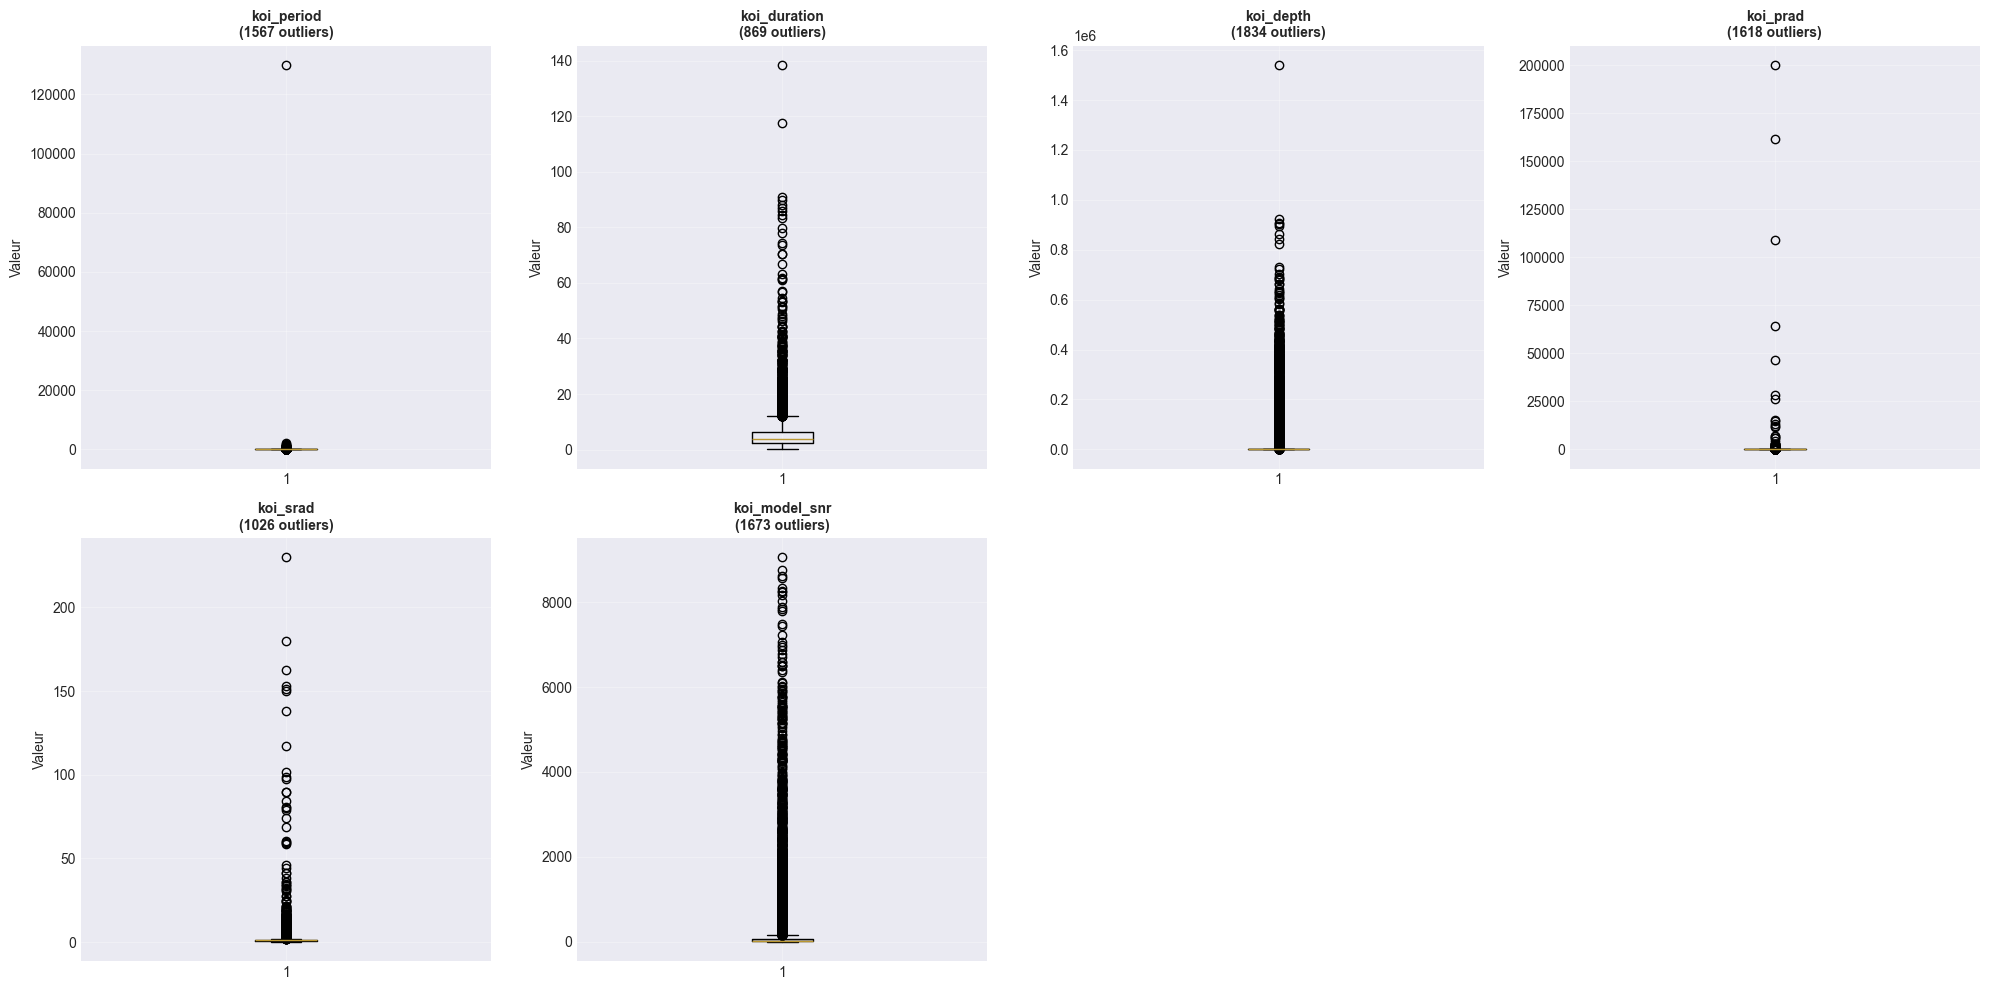

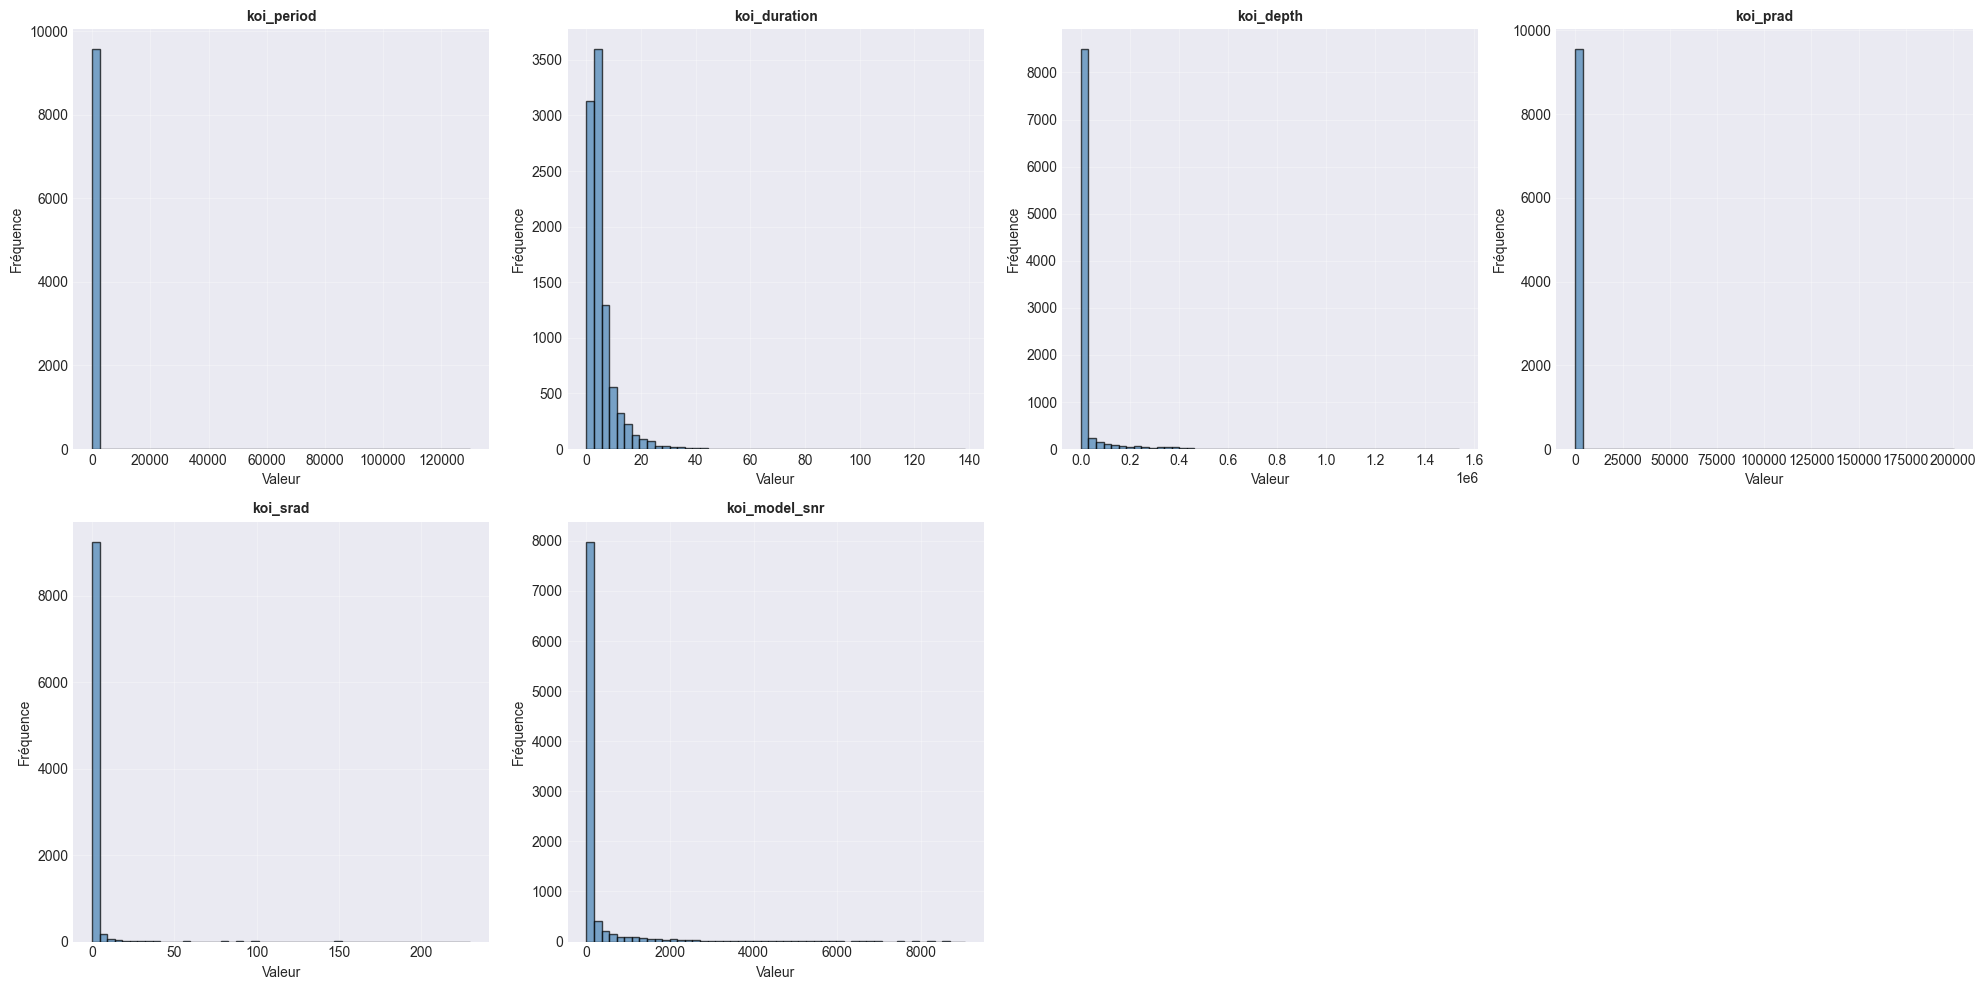

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Charger le dataset nettoyé
file_path = "C:/Users/chaym/Desktop/NasaChallenge/data/processed/Kepler_cleaned.csv"
df = pd.read_csv(file_path)

print(f"{'='*70}")
print(f"ANALYSE DES OUTLIERS - DATASET KEPLER")
print(f"{'='*70}")
print(f"Dimensions du dataset: {df.shape}\n")

# Sélectionner uniquement les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Exclure les colonnes d'identifiant
exclude_cols = ['kepid']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

print(f"Nombre de colonnes numériques analysées: {len(numeric_cols)}\n")

# ==========================================
# 1. MÉTHODE IQR (Interquartile Range)
# ==========================================
print(f"{'='*70}")
print(f"1. DÉTECTION DES OUTLIERS PAR MÉTHODE IQR")
print(f"{'='*70}\n")

outliers_iqr = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_iqr[col] = len(outliers)
    
    if len(outliers) > 0:
        percentage = (len(outliers) / len(df)) * 100
        print(f"{col}:")
        print(f"  - Q1: {Q1:.4f}, Q3: {Q3:.4f}, IQR: {IQR:.4f}")
        print(f"  - Limites: [{lower_bound:.4f}, {upper_bound:.4f}]")
        print(f"  - Outliers: {len(outliers)} ({percentage:.2f}%)")
        print(f"  - Min: {df[col].min():.4f}, Max: {df[col].max():.4f}\n")

# ==========================================
# 2. MÉTHODE Z-SCORE
# ==========================================
print(f"\n{'='*70}")
print(f"2. DÉTECTION DES OUTLIERS PAR Z-SCORE (|Z| > 3)")
print(f"{'='*70}\n")

outliers_zscore = {}
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col], nan_policy='omit'))
    outliers = df[z_scores > 3]
    outliers_zscore[col] = len(outliers)
    
    if len(outliers) > 0:
        percentage = (len(outliers) / len(df)) * 100
        print(f"{col}:")
        print(f"  - Outliers: {len(outliers)} ({percentage:.2f}%)")
        print(f"  - Z-score max: {z_scores.max():.2f}\n")

# ==========================================
# 3. RÉSUMÉ STATISTIQUE
# ==========================================
print(f"\n{'='*70}")
print(f"3. STATISTIQUES DESCRIPTIVES")
print(f"{'='*70}\n")

summary = df[numeric_cols].describe()
print(summary)

# ==========================================
# 4. VISUALISATIONS
# ==========================================
print(f"\n{'='*70}")
print(f"4. GÉNÉRATION DES VISUALISATIONS")
print(f"{'='*70}\n")

# Sélectionner les colonnes les plus importantes pour la visualisation
key_columns = [
    'koi_period', 'koi_duration', 'koi_depth', 
    'koi_prad', 'koi_srad', 'koi_model_snr'
]

# Filtrer les colonnes qui existent dans le dataset
key_columns = [col for col in key_columns if col in numeric_cols]

# Créer les boxplots
n_cols = 4
n_rows = int(np.ceil(len(key_columns) / n_cols))

fig1, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(key_columns):
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].set_title(f'{col}\n({outliers_iqr[col]} outliers)', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Valeur')
    axes[idx].grid(True, alpha=0.3)

# Masquer les axes vides
for idx in range(len(key_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()

# Créer les histogrammes avec distribution normale
fig2, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(key_columns):
    data = df[col].dropna()
    axes[idx].hist(data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Valeur')
    axes[idx].set_ylabel('Fréquence')
    axes[idx].grid(True, alpha=0.3)

# Masquer les axes vides
for idx in range(len(key_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()


# ==========================================
# 5. RAPPORT RÉCAPITULATIF
# ==========================================
print(f"\n{'='*70}")
print(f"5. RAPPORT RÉCAPITULATIF DES OUTLIERS")
print(f"{'='*70}\n")

# Créer un DataFrame récapitulatif
recap_data = []
for col in numeric_cols:
    recap_data.append({
        'Colonne': col,
        'Outliers IQR': outliers_iqr[col],
        'Outliers Z-Score': outliers_zscore[col],
        '% IQR': f"{(outliers_iqr[col]/len(df)*100):.2f}%",
        '% Z-Score': f"{(outliers_zscore[col]/len(df)*100):.2f}%"
    })

recap_df = pd.DataFrame(recap_data)
recap_df = recap_df.sort_values('Outliers IQR', ascending=False)

print(recap_df.to_string(index=False))


# Afficher les colonnes avec le plus d'outliers
print(f"\n{'='*70}")
print(f"TOP 10 DES COLONNES AVEC LE PLUS D'OUTLIERS (IQR)")
print(f"{'='*70}\n")
print(recap_df.head(10).to_string(index=False))

print(f"\n{'='*70}")
print(f"ANALYSE TERMINÉE")

TRAITEMENT DES OUTLIERS - DATASET KEPLER
Dimensions initiales: (9564, 19)

STRATÉGIE DE TRAITEMENT

CAP_IQR:
  Description: Winsorisation (IQR) - Limiter aux limites IQR
  Colonnes concernées: 6
  koi_period, koi_duration, koi_depth, koi_prad, koi_model_snr...

CAP_PERCENTILE:
  Description: Winsorisation (Percentiles) - Limiter à 1er et 99e percentile
  Colonnes concernées: 8
  koi_period_err1, koi_period_err2, koi_duration_err1, koi_duration_err2, koi_depth_err1...

KEEP_EXTREME:
  Description: Garder les valeurs - Variables physiquement justifiées
  Colonnes concernées: 2
  koi_srad_err1, koi_srad_err2


MÉTHODE 1: WINSORISATION PAR IQR (Capping)

koi_period: 1567 valeurs limitées à [-54.2386, 97.6874]
koi_duration: 869 valeurs limitées à [-3.3204, 12.0346]
koi_depth: 1834 valeurs limitées à [-1595.6625, 3104.2375]
koi_prad: 1618 valeurs limitées à [-16.0938, 30.6362]
koi_model_snr: 1673 valeurs limitées à [-75.9375, 159.3625]
koi_srad: 1026 valeurs limitées à [0.0545, 2.1305]

MÉTH

C:\Users\chaym\AppData\Local\Temp\ipykernel_7156\282494623.py:191: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([df_original[col].dropna(), df[col].dropna()],
C:\Users\chaym\AppData\Local\Temp\ipykernel_7156\282494623.py:191: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([df_original[col].dropna(), df[col].dropna()],
C:\Users\chaym\AppData\Local\Temp\ipykernel_7156\282494623.py:191: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([df_original[col].dropna(), df[col].dropna()],
C:\Users\chaym\AppData\Local\Temp\ipykernel_7156\282494623.py:191: MatplotlibDeprecationWar

✓ Dataset avec winsorisation: Kepler_winsorized.csv
  Dimensions: (9564, 19)
✓ Dataset sans outliers extrêmes: Kepler_no_extreme.csv
  Dimensions: (9564, 19)
TRAITEMENT TERMINÉ


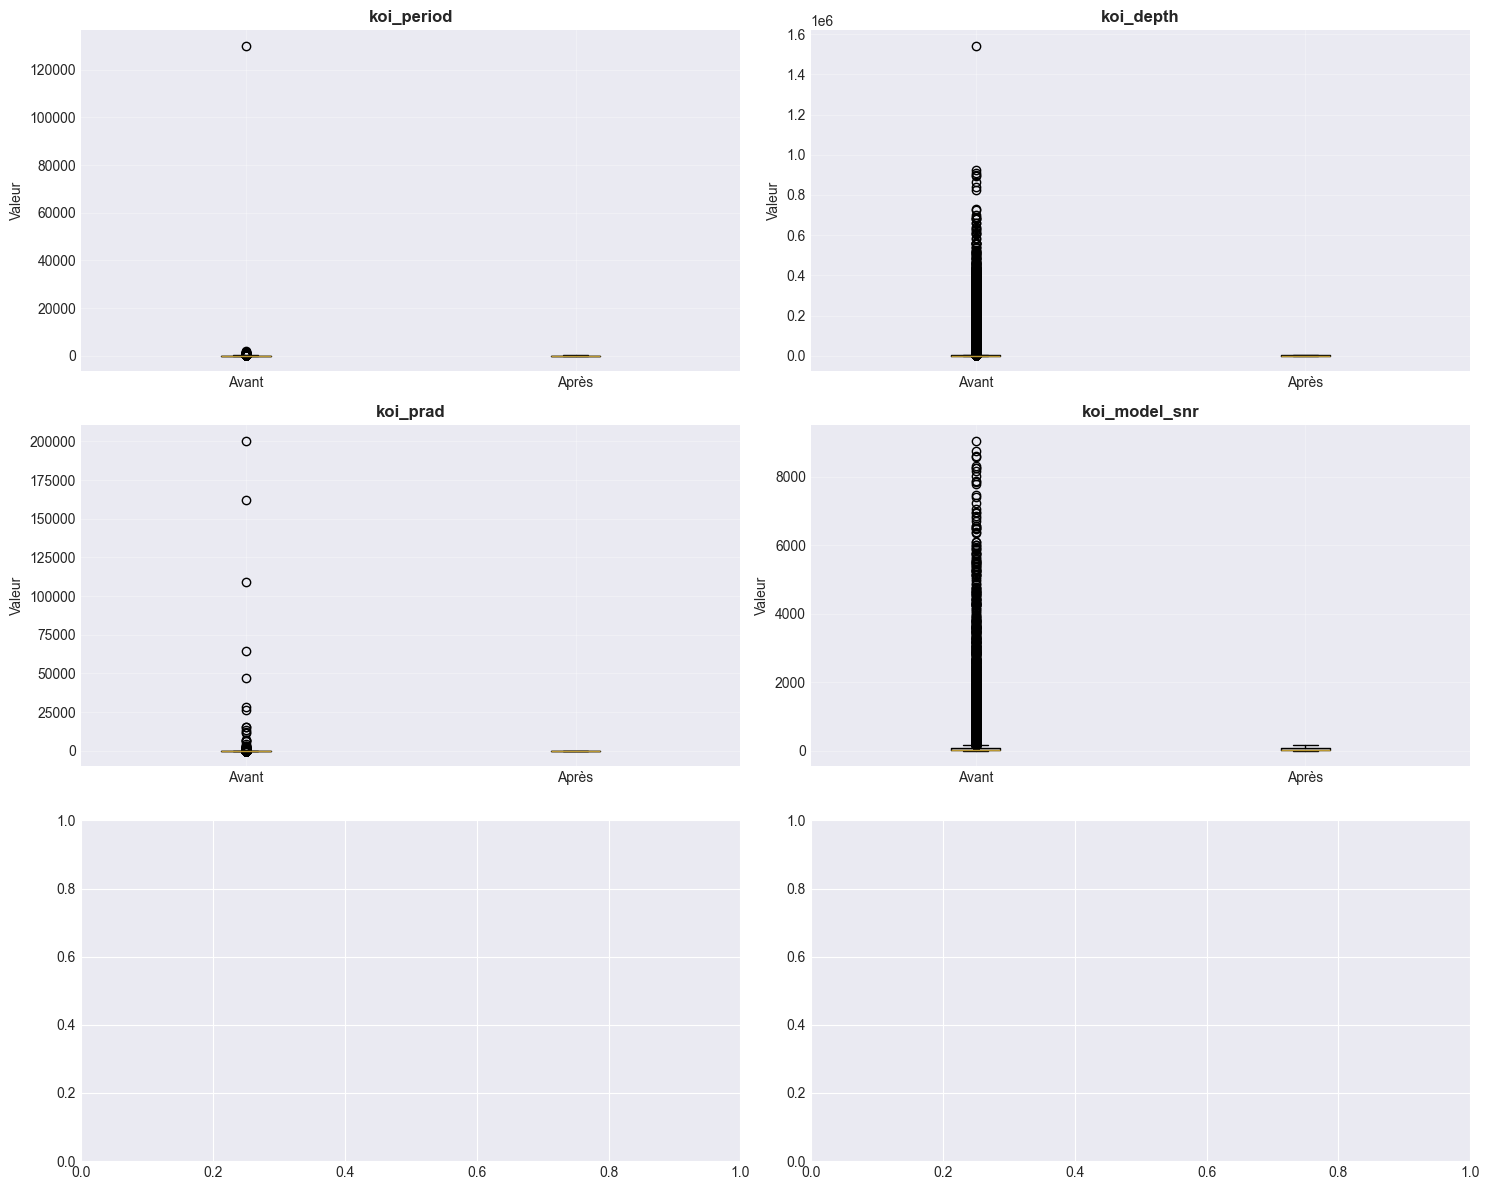

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
file_path = "C:/Users/chaym/Desktop/NasaChallenge/data/processed/Kepler_cleaned.csv"
df = pd.read_csv(file_path)

print(f"{'='*80}")
print(f"TRAITEMENT DES OUTLIERS - DATASET KEPLER")
print(f"{'='*80}")
print(f"Dimensions initiales: {df.shape}\n")

# Créer une copie pour comparaison
df_original = df.copy()

# ================================================================================
# STRATÉGIE DE TRAITEMENT DES OUTLIERS
# ================================================================================

print(f"{'='*80}")
print(f"STRATÉGIE DE TRAITEMENT")
print(f"{'='*80}\n")

# Définir les colonnes par catégorie et méthode de traitement
treatment_strategy = {
    'cap_iqr': {
        'description': 'Winsorisation (IQR) - Limiter aux limites IQR',
        'columns': [
            'koi_period', 'koi_duration', 'koi_depth', 
            'koi_prad', 'koi_model_snr', 'koi_srad'
        ]
    },
    'cap_percentile': {
        'description': 'Winsorisation (Percentiles) - Limiter à 1er et 99e percentile',
        'columns': [
            'koi_period_err1', 'koi_period_err2',
            'koi_duration_err1', 'koi_duration_err2',
            'koi_depth_err1', 'koi_depth_err2',
            'koi_prad_err1', 'koi_prad_err2'
        ]
    },
    'keep_extreme': {
        'description': 'Garder les valeurs - Variables physiquement justifiées',
        'columns': [
            'koi_srad_err1', 'koi_srad_err2'
        ]
    }
}

for method, info in treatment_strategy.items():
    print(f"{method.upper()}:")
    print(f"  Description: {info['description']}")
    print(f"  Colonnes concernées: {len(info['columns'])}")
    print(f"  {', '.join(info['columns'][:5])}{'...' if len(info['columns']) > 5 else ''}\n")

# ================================================================================
# MÉTHODE 1: WINSORISATION PAR IQR
# ================================================================================

print(f"\n{'='*80}")
print(f"MÉTHODE 1: WINSORISATION PAR IQR (Capping)")
print(f"{'='*80}\n")

outliers_capped_iqr = {}
for col in treatment_strategy['cap_iqr']['columns']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Compter les outliers avant traitement
        outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        
        # Appliquer le capping
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        
        outliers_capped_iqr[col] = outliers_before
        if outliers_before > 0:
            print(f"{col}: {outliers_before} valeurs limitées à [{lower_bound:.4f}, {upper_bound:.4f}]")

# ================================================================================
# MÉTHODE 2: WINSORISATION PAR PERCENTILES (1%-99%)
# ================================================================================

print(f"\n{'='*80}")
print(f"MÉTHODE 2: WINSORISATION PAR PERCENTILES (1%-99%)")
print(f"{'='*80}\n")

outliers_capped_pct = {}
for col in treatment_strategy['cap_percentile']['columns']:
    if col in df.columns:
        p1 = df[col].quantile(0.01)
        p99 = df[col].quantile(0.99)
        
        # Compter les outliers avant traitement
        outliers_before = ((df[col] < p1) | (df[col] > p99)).sum()
        
        # Appliquer le capping
        df[col] = df[col].clip(lower=p1, upper=p99)
        
        outliers_capped_pct[col] = outliers_before
        if outliers_before > 0:
            print(f"{col}: {outliers_before} valeurs limitées à [{p1:.6f}, {p99:.6f}]")


# ================================================================================
# MÉTHODE 3: ANALYSE DES VALEURS EXTRÊMES À CONSERVER
# ================================================================================

print(f"\n{'='*80}")
print(f"MÉTHODE 4: VALEURS EXTRÊMES CONSERVÉES")
print(f"{'='*80}\n")

for col in treatment_strategy['keep_extreme']['columns'][:5]:
    if col in df.columns:
        print(f"  {col}: Min={df[col].min():.4f}, Max={df[col].max():.4f}")

# ================================================================================
# OPTION ALTERNATIVE: SUPPRESSION DES OUTLIERS EXTRÊMES
# ================================================================================

print(f"\n{'='*80}")
print(f"OPTION ALTERNATIVE: SUPPRESSION DES OUTLIERS EXTRÊMES (Z-SCORE)")
print(f"{'='*80}\n")

# Créer une version avec suppression des outliers extrêmes (|Z| > 4)
df_no_extreme = df.copy()

key_columns = ['koi_period', 'koi_depth', 'koi_prad']
rows_before = len(df_no_extreme)

for col in key_columns:
    if col in df_no_extreme.columns:
        z_scores = np.abs(stats.zscore(df_no_extreme[col]))
        df_no_extreme = df_no_extreme[z_scores < 4]

rows_after = len(df_no_extreme)
print(f"Suppression des outliers extrêmes (|Z| > 4):")
print(f"  - Lignes supprimées: {rows_before - rows_after}")
print(f"  - Lignes restantes: {rows_after} ({(rows_after/rows_before)*100:.2f}%)")

# ================================================================================
# COMPARAISON AVANT/APRÈS
# ================================================================================

print(f"\n{'='*80}")
print(f"COMPARAISON STATISTIQUES AVANT/APRÈS TRAITEMENT")
print(f"{'='*80}\n")

comparison_cols = ['koi_period', 'koi_depth', 'koi_prad']
comparison_data = []

for col in comparison_cols:
    if col in df.columns:
        comparison_data.append({
            'Colonne': col,
            'Min Avant': f"{df_original[col].min():.2f}",
            'Min Après': f"{df[col].min():.2f}",
            'Max Avant': f"{df_original[col].max():.2f}",
            'Max Après': f"{df[col].max():.2f}",
            'Médiane Avant': f"{df_original[col].median():.2f}",
            'Médiane Après': f"{df[col].median():.2f}"
        })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# ================================================================================
# VISUALISATIONS
# ================================================================================

print(f"\n{'='*80}")
print(f"GÉNÉRATION DES VISUALISATIONS")
print(f"{'='*80}\n")

# Comparaison avant/après pour les colonnes clés
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

comparison_visual_cols = ['koi_period', 'koi_depth', 'koi_prad', 'koi_model_snr']

for idx, col in enumerate(comparison_visual_cols):
    if col in df.columns:
        axes[idx].boxplot([df_original[col].dropna(), df[col].dropna()], 
                         labels=['Avant', 'Après'])
        axes[idx].set_title(f'{col}', fontweight='bold')
        axes[idx].set_ylabel('Valeur')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()


# ================================================================================
# SAUVEGARDER LES DATASETS
# ================================================================================

print(f"\n{'='*80}")
print(f"SAUVEGARDE DES DATASETS TRAITÉS")
print(f"{'='*80}\n")

# Dataset avec winsorisation
output_path1 = "C:/Users/chaym/Desktop/NasaChallenge/data/processed/Kepler_winsorized.csv"
df.to_csv(output_path1, index=False)
print(f"✓ Dataset avec winsorisation: Kepler_winsorized.csv")
print(f"  Dimensions: {df.shape}")

# Dataset avec suppression des extrêmes
output_path2 = "C:/Users/chaym/Desktop/NasaChallenge/data/processed/Kepler_no_extreme.csv"
df_no_extreme.to_csv(output_path2, index=False)
print(f"✓ Dataset sans outliers extrêmes: Kepler_no_extreme.csv")
print(f"  Dimensions: {df_no_extreme.shape}")


print(f"{'='*80}")
print(f"TRAITEMENT TERMINÉ")
print(f"{'='*80}")

# Class Distribution

ÉTAPE 1 - ANALYSE DE LA VARIABLE CIBLE (koi_disposition)

Dimensions du dataset: (9564, 19)
Colonnes: 19
Observations: 9564

1. DISTRIBUTION DES CLASSES

Nombre d'observations par classe:
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64

Pourcentages par classe:
  FALSE POSITIVE: 50.60%
  CONFIRMED: 28.71%
  CANDIDATE: 20.69%

2. ANALYSE DU DÉSÉQUILIBRE DES CLASSES

Ratio de déséquilibre: 2.45
Classe majoritaire: FALSE POSITIVE (4839 obs)
Classe minoritaire: CANDIDATE (1979 obs)

Léger déséquilibre - Techniques de base suffisantes

3. VISUALISATIONS


4. STATISTIQUES SUPPLÉMENTAIRES

Valeurs manquantes dans koi_disposition: 0
Toutes les observations ont un label

Nombre de classes uniques: 3
Classes: ['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']


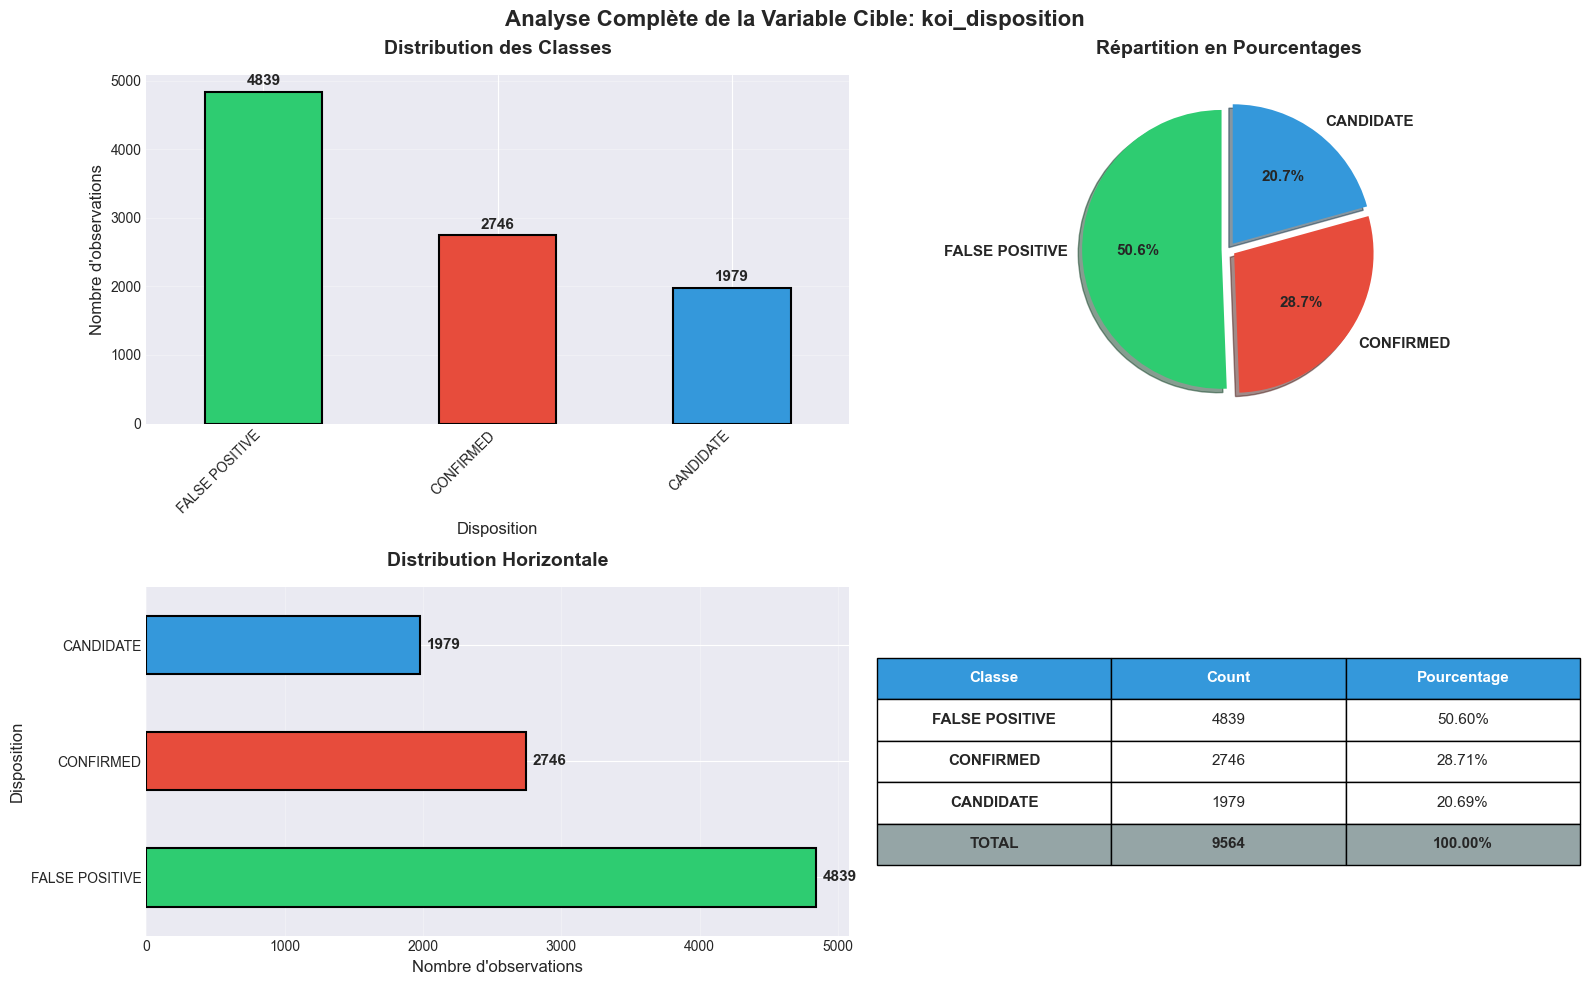

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
file_path = "C:/Users/chaym/Desktop/NasaChallenge/data/processed/Kepler_winsorized.csv"
df = pd.read_csv(file_path)

print(f"{'='*80}")
print(f"ÉTAPE 1 - ANALYSE DE LA VARIABLE CIBLE (koi_disposition)")
print(f"{'='*80}\n")

print(f"Dimensions du dataset: {df.shape}")
print(f"Colonnes: {df.shape[1]}")
print(f"Observations: {df.shape[0]}\n")

# ================================================================================
# 1. DISTRIBUTION DES CLASSES
# ===============================================================================

print(f"{'='*80}")
print(f"1. DISTRIBUTION DES CLASSES")
print(f"{'='*80}\n")

# Comptage des classes
class_counts = df['koi_disposition'].value_counts()
print("Nombre d'observations par classe:")
print(class_counts)
print()

# Pourcentages
class_percentages = df['koi_disposition'].value_counts(normalize=True) * 100
print("Pourcentages par classe:")
for classe, pourcentage in class_percentages.items():
    print(f"  {classe}: {pourcentage:.2f}%")

# ================================================================================
# 2. CALCUL DU DÉSÉQUILIBRE
# ================================================================================

print(f"\n{'='*80}")
print(f"2. ANALYSE DU DÉSÉQUILIBRE DES CLASSES")
print(f"{'='*80}\n")

# Ratio de déséquilibre (classe majoritaire / classe minoritaire)
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Ratio de déséquilibre: {imbalance_ratio:.2f}")
print(f"Classe majoritaire: {class_counts.idxmax()} ({class_counts.max()} obs)")
print(f"Classe minoritaire: {class_counts.idxmin()} ({class_counts.min()} obs)")

# Évaluation du niveau de déséquilibre
if imbalance_ratio < 1.5:
    print("\n✓ Dataset bien équilibré")
elif imbalance_ratio < 3:
    print("\nLéger déséquilibre - Techniques de base suffisantes")
elif imbalance_ratio < 10:
    print("\nDéséquilibre modéré - Utiliser class_weight ou SMOTE")
else:
    print("\nDéséquilibre sévère - Techniques avancées nécessaires")

# ================================================================================
# 3. VISUALISATIONS
# ================================================================================

print(f"\n{'='*80}")
print(f"3. VISUALISATIONS")
print(f"{'='*80}\n")

# Créer une figure avec plusieurs graphiques
fig = plt.figure(figsize=(16, 10))

# 3.1 Graphique en barres
ax1 = plt.subplot(2, 2, 1)
colors = ['#2ecc71', '#e74c3c', '#3498db']
class_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.5)
plt.title('Distribution des Classes', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Disposition', fontsize=12)
plt.ylabel('Nombre d\'observations', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold', fontsize=11)

# 3.2 Graphique en camembert
ax2 = plt.subplot(2, 2, 2)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'},
        explode=(0.05, 0.05, 0.05), shadow=True)
plt.title('Répartition en Pourcentages', fontsize=14, fontweight='bold', pad=15)

# 3.3 Graphique horizontal pour mieux voir les noms
ax3 = plt.subplot(2, 2, 3)
class_counts.plot(kind='barh', color=colors, edgecolor='black', linewidth=1.5)
plt.title('Distribution Horizontale', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Nombre d\'observations', fontsize=12)
plt.ylabel('Disposition', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')

# Ajouter les valeurs sur les barres
for i, v in enumerate(class_counts.values):
    plt.text(v + 50, i, str(v), ha='left', va='center', fontweight='bold', fontsize=11)

# 3.4 Tableau récapitulatif
ax4 = plt.subplot(2, 2, 4)
ax4.axis('tight')
ax4.axis('off')

# Créer les données du tableau
table_data = []
for classe in class_counts.index:
    count = class_counts[classe]
    percentage = class_percentages[classe]
    table_data.append([classe, count, f"{percentage:.2f}%"])

# Ajouter une ligne totale
table_data.append(['TOTAL', class_counts.sum(), '100.00%'])

# Créer le tableau
table = ax4.table(cellText=table_data,
                  colLabels=['Classe', 'Count', 'Pourcentage'],
                  cellLoc='center',
                  loc='center',
                  colColours=['#f0f0f0']*3)

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style du tableau
for i in range(len(table_data) + 1):
    for j in range(3):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#3498db')
            cell.set_text_props(weight='bold', color='white')
        elif i == len(table_data):  # Dernière ligne (TOTAL)
            cell.set_facecolor('#95a5a6')
            cell.set_text_props(weight='bold')
        else:
            if j == 0:  # Première colonne
                cell.set_text_props(weight='bold')

plt.suptitle('Analyse Complète de la Variable Cible: koi_disposition', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()



# ================================================================================
# 4. STATISTIQUES SUPPLÉMENTAIRES
# ================================================================================

print(f"\n{'='*80}")
print(f"4. STATISTIQUES SUPPLÉMENTAIRES")
print(f"{'='*80}\n")

# Vérifier les valeurs manquantes dans la cible
missing_target = df['koi_disposition'].isnull().sum()
print(f"Valeurs manquantes dans koi_disposition: {missing_target}")

if missing_target > 0:
    print(f"Attention: {missing_target} observations sans label")
else:
    print("Toutes les observations ont un label")

# Valeurs uniques
print(f"\nNombre de classes uniques: {df['koi_disposition'].nunique()}")
print(f"Classes: {df['koi_disposition'].unique().tolist()}")



# Feature Selection

ÉTAPE 2 - SÉLECTION DES FEATURES

Dimensions du dataset: (9564, 19)

1. IDENTIFICATION DES COLONNES

Toutes les colonnes du dataset:
   1. kepid
   2. kepoi_name
   3. koi_disposition
   4. koi_period
   5. koi_period_err1
   6. koi_period_err2
   7. koi_duration
   8. koi_duration_err1
   9. koi_duration_err2
  10. koi_depth
  11. koi_depth_err1
  12. koi_depth_err2
  13. koi_prad
  14. koi_prad_err1
  15. koi_prad_err2
  16. koi_srad
  17. koi_srad_err1
  18. koi_srad_err2
  19. koi_model_snr

2. COLONNES À EXCLURE

Colonnes à exclure:
  ✗ kepid
     → Raison: (Identifiant)
  ✗ kepoi_name
     → Raison: (Identifiant)
  ✗ koi_disposition
     → Raison: (Variable cible)

3. SÉPARATION X (FEATURES) ET y (TARGET)

 Séparation effectuée:
  • X (Features): (9564, 16)
  • y (Target): (9564,)

 Nombre de features sélectionnées: 16
 Nombre d'observations: 9564

4. FEATURES SÉLECTIONNÉES

Liste des 16 features:
   1. koi_period
   2. koi_period_err1
   3. koi_period_err2
   4. koi_duration
   

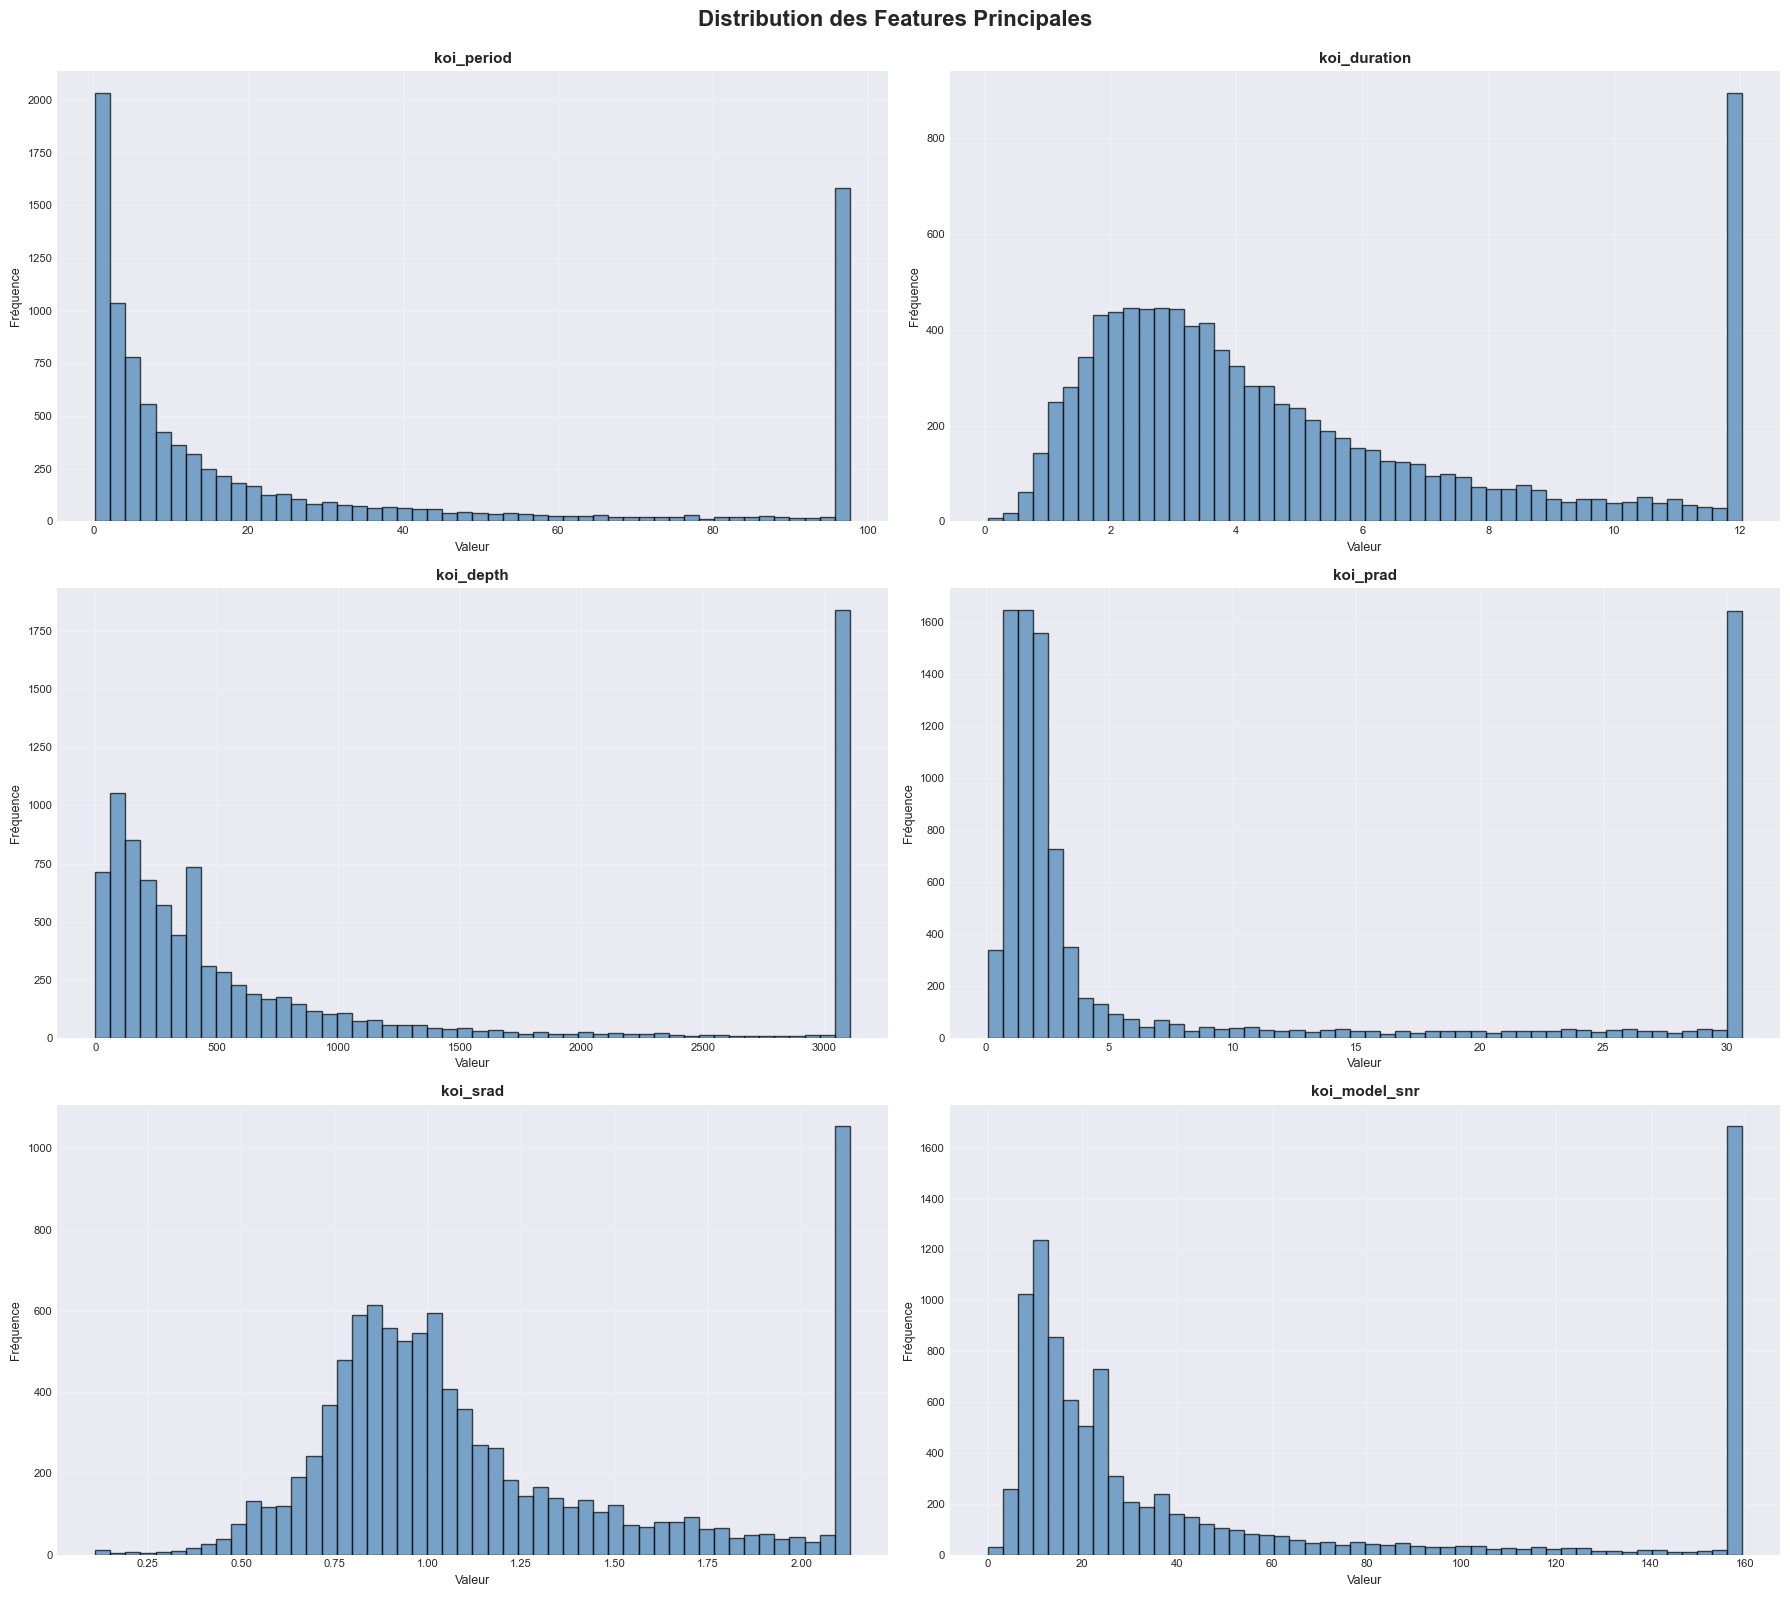

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
file_path = "C:/Users/chaym/Desktop/NasaChallenge/data/processed/Kepler_winsorized.csv"
df = pd.read_csv(file_path)

print(f"{'='*80}")
print(f"ÉTAPE 2 - SÉLECTION DES FEATURES")
print(f"{'='*80}\n")

print(f"Dimensions du dataset: {df.shape}\n")

# ================================================================================
# 1. IDENTIFICATION DES COLONNES
# ================================================================================

print(f"{'='*80}")
print(f"1. IDENTIFICATION DES COLONNES")
print(f"{'='*80}\n")

print("Toutes les colonnes du dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

# ================================================================================
# 2. COLONNES À EXCLURE
# ================================================================================

print(f"\n{'='*80}")
print(f"2. COLONNES À EXCLURE")
print(f"{'='*80}\n")

# Colonnes d'identification (non pertinentes pour la prédiction)
id_columns = ['kepid', 'kepoi_name']

# Variable cible
target_column = 'koi_disposition'

# Colonnes supprimées précédemment ou non pertinentes
removed_columns = []  # Si vous en avez supprimé d'autres

# Liste complète des colonnes à exclure
exclude_columns = id_columns + [target_column] + removed_columns

print("Colonnes à exclure:")
for col in exclude_columns:
    if col in df.columns:
        print(f"  ✗ {col}")
        reason = ""
        if col in id_columns:
            reason = "(Identifiant)"
        elif col == target_column:
            reason = "(Variable cible)"
        else:
            reason = "(Supprimée)"
        print(f"     → Raison: {reason}")

# ================================================================================
# 3. SÉPARATION X (FEATURES) ET y (TARGET)
# ================================================================================

print(f"\n{'='*80}")
print(f"3. SÉPARATION X (FEATURES) ET y (TARGET)")
print(f"{'='*80}\n")

# Vérifier que la variable cible existe
if target_column not in df.columns:
    print(f" Erreur: La colonne '{target_column}' n'existe pas!")
else:
    # Séparer X et y
    y = df[target_column].copy()
    X = df.drop(columns=exclude_columns, errors='ignore')
    
    print(f" Séparation effectuée:")
    print(f"  • X (Features): {X.shape}")
    print(f"  • y (Target): {y.shape}")
    
    print(f"\n Nombre de features sélectionnées: {X.shape[1]}")
    print(f" Nombre d'observations: {X.shape[0]}")

# ================================================================================
# 4. LISTE DES FEATURES SÉLECTIONNÉES
# ================================================================================

print(f"\n{'='*80}")
print(f"4. FEATURES SÉLECTIONNÉES")
print(f"{'='*80}\n")

print(f"Liste des {X.shape[1]} features:")
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2d}. {col}")


# ================================================================================
# 5. TYPES DE DONNÉES
# ================================================================================

print(f"\n{'='*80}")
print(f"5. TYPES DE DONNÉES")
print(f"{'='*80}\n")

print("Distribution des types de données:")
print(X.dtypes.value_counts())

print("\nDétail par colonne:")
for dtype in X.dtypes.unique():
    cols_of_type = X.select_dtypes(include=[dtype]).columns.tolist()
    print(f"\n{dtype} ({len(cols_of_type)} colonnes):")
    for col in cols_of_type[:5]:  # Afficher les 5 premières
        print(f"  • {col}")
    if len(cols_of_type) > 5:
        print(f"  ... et {len(cols_of_type) - 5} autres")

# ================================================================================
# 6. STATISTIQUES DESCRIPTIVES
# ================================================================================

print(f"\n{'='*80}")
print(f"6. APERÇU DES DONNÉES (5 premières lignes)")
print(f"{'='*80}\n")

print(X.head())

print(f"\n{'='*80}")
print(f"7. STATISTIQUES DESCRIPTIVES")
print(f"{'='*80}\n")

stats = X.describe()
print(stats)

# ================================================================================
# 8. VISUALISATION DE LA DISTRIBUTION DES FEATURES
# ================================================================================

print(f"\n{'='*80}")
print(f"8. VISUALISATION")
print(f"{'='*80}\n")

# Sélectionner quelques features importantes pour visualisation
key_features = ['koi_period', 'koi_duration', 'koi_depth', 
                'koi_prad', 'koi_srad', 'koi_model_snr']

key_features = [f for f in key_features if f in X.columns]

# Créer des histogrammes
fig, axes = plt.subplots(3,2, figsize=(18, 16))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    axes[idx].hist(X[col].dropna(), bins=50, color='steelblue', 
                   edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontweight='bold', fontsize=11)
    axes[idx].set_xlabel('Valeur', fontsize=9)
    axes[idx].set_ylabel('Fréquence', fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(labelsize=8)

# Masquer les axes vides
for idx in range(len(key_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution des Features Principales', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()

# ================================================================================
# 9. SAUVEGARDE DES DONNÉES
# ================================================================================

print(f"\n{'='*80}")
print(f"9. SAUVEGARDE")
print(f"{'='*80}\n")

# Sauvegarder X et y séparément
X.to_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step2_X_features.csv', index=False)
y.to_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step2_y_target.csv', index=False)

print(" Fichiers sauvegardés:")
print("  1. step2_X_features.csv - Features (X)")
print("  2. step2_y_target.csv - Target (y)")

# ================================================================================
# 10. RÉSUMÉ
# ================================================================================

print(f"\n{'='*80}")
print(f"RÉSUMÉ DE L'ÉTAPE 2")
print(f"{'='*80}\n")

summary = {
    'Dataset original': df.shape,
    'Features (X)': X.shape,
    'Target (y)': y.shape,
    'Colonnes exclues': len(exclude_columns),
    'Features numériques': len(X.select_dtypes(include=[np.number]).columns),
    'Features catégorielles': len(X.select_dtypes(exclude=[np.number]).columns),
}

for key, value in summary.items():
    print(f"  {key}: {value}")

print(f"\n{'='*80}")
print(f"ÉTAPE 2 TERMINÉE ✓")

# Final Verification

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données préparées
X = pd.read_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step2_X_features.csv')
y = pd.read_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step2_y_target.csv')

print(f"{'='*80}")
print(f"ÉTAPE 3 - VÉRIFICATION FINALE DES DONNÉES")
print(f"{'='*80}\n")

print(f"Dimensions X: {X.shape}")
print(f"Dimensions y: {y.shape}\n")

# ================================================================================
# 1. VÉRIFICATION DES VALEURS MANQUANTES
# ================================================================================

print(f"{'='*80}")
print(f"1. VÉRIFICATION DES VALEURS MANQUANTES")
print(f"{'='*80}\n")

# Comptage des valeurs manquantes
missing_counts = X.isnull().sum()
missing_percentages = (X.isnull().sum() / len(X)) * 100

# Créer un DataFrame pour l'affichage
missing_df = pd.DataFrame({
    'Feature': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_percentages.values
})

# Trier par nombre de valeurs manquantes
missing_df = missing_df.sort_values('Missing_Count', ascending=False)

# Afficher seulement les colonnes avec des valeurs manquantes
missing_df_filtered = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df_filtered) > 0:
    print(f"⚠️  {len(missing_df_filtered)} colonnes avec valeurs manquantes:\n")
    print(missing_df_filtered.to_string(index=False))
    print(f"\n ATTENTION: Des valeurs manquantes ont été détectées!")
    print("   → Il faut les traiter avant de continuer")
else:
    print("Aucune valeur manquante détectée dans X")

# Vérifier y
missing_y = y.isnull().sum().sum()
if missing_y > 0:
    print(f"\n  {missing_y} valeurs manquantes dans y")
else:
    print("Aucune valeur manquante dans y")

# Visualisation des valeurs manquantes
if len(missing_df_filtered) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(missing_df_filtered['Feature'][:20], missing_df_filtered['Missing_Percentage'][:20], 
             color='#e74c3c', edgecolor='black')
    plt.xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Top 10 Features avec Valeurs Manquantes', fontsize=14, fontweight='bold', pad=15)
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()

# ================================================================================
# 2. VÉRIFICATION DES VALEURS INFINIES
# ================================================================================

print(f"\n{'='*80}")
print(f"2. VÉRIFICATION DES VALEURS INFINIES")
print(f"{'='*80}\n")

# Vérifier les valeurs infinies
inf_counts = np.isinf(X.select_dtypes(include=[np.number])).sum()
inf_counts_filtered = inf_counts[inf_counts > 0]

if len(inf_counts_filtered) > 0:
    print(f"⚠️  {len(inf_counts_filtered)} colonnes avec valeurs infinies:\n")
    for col, count in inf_counts_filtered.items():
        print(f"  • {col}: {count} valeurs infinies")
    print(f"\nATTENTION: Des valeurs infinies ont été détectées!")
    print("   → Il faut les traiter avant de continuer")
else:
    print("Aucune valeur infinie détectée")

# ================================================================================
# 3. VÉRIFICATION DES TYPES DE DONNÉES
# ================================================================================

print(f"\n{'='*80}")
print(f"3. VÉRIFICATION DES TYPES DE DONNÉES")
print(f"{'='*80}\n")

print("Distribution des types de données:")
type_counts = X.dtypes.value_counts()
print(type_counts)

# Vérifier s'il y a des colonnes non numériques
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()

if len(non_numeric) > 0:
    print(f"\n {len(non_numeric)} colonnes non-numériques détectées:")
    for col in non_numeric:
        print(f"  • {col} ({X[col].dtype})")
        print(f"    Valeurs uniques: {X[col].nunique()}")
        print(f"    Exemples: {X[col].unique()[:5].tolist()}")
    print("\n Ces colonnes nécessitent un encodage avant la modélisation")
else:
    print("\nToutes les colonnes sont numériques")

# ================================================================================
# 4. VÉRIFICATION DES VALEURS ABERRANTES (RANGE)
# ================================================================================

print(f"\n{'='*80}")
print(f"4. VÉRIFICATION DES RANGES DE VALEURS")
print(f"{'='*80}\n")

# Statistiques min/max pour quelques colonnes clés
key_features = ['koi_period', 'koi_prad', 'koi_depth', 'koi_srad', 'koi_model_snr']
key_features = [f for f in key_features if f in X.columns]

print("Range des valeurs pour features principales:\n")
range_data = []
for col in key_features:
    range_data.append({
        'Feature': col,
        'Min': f"{X[col].min():.4f}",
        'Max': f"{X[col].max():.4f}",
        'Mean': f"{X[col].mean():.4f}",
        'Std': f"{X[col].std():.4f}"
    })

range_df = pd.DataFrame(range_data)
print(range_df.to_string(index=False))

# ================================================================================
# 5. VÉRIFICATION DE LA COHÉRENCE DES DIMENSIONS
# ================================================================================

print(f"\n{'='*80}")
print(f"5. VÉRIFICATION DE LA COHÉRENCE DES DIMENSIONS")
print(f"{'='*80}\n")

# Vérifier que X et y ont le même nombre de lignes
if X.shape[0] == y.shape[0]:
    print(f"✓ X et y ont le même nombre d'observations: {X.shape[0]}")
else:
    print(f"❌ ERREUR: Dimensions incompatibles!")
    print(f"   X: {X.shape[0]} lignes")
    print(f"   y: {y.shape[0]} lignes")

# Vérifier qu'il n'y a pas de doublons d'index
if X.index.duplicated().any():
    print(f"\n⚠️  {X.index.duplicated().sum()} index dupliqués dans X")
else:
    print("✓ Pas d'index dupliqué dans X")

# ================================================================================
# 6. VÉRIFICATION DES VALEURS CONSTANTES
# ================================================================================

print(f"\n{'='*80}")
print(f"6. VÉRIFICATION DES COLONNES CONSTANTES")
print(f"{'='*80}\n")

# Identifier les colonnes avec une seule valeur unique
constant_cols = []
for col in X.columns:
    if X[col].nunique() == 1:
        constant_cols.append(col)

if len(constant_cols) > 0:
    print(f"⚠️  {len(constant_cols)} colonnes constantes détectées:")
    for col in constant_cols:
        print(f"  • {col} (valeur: {X[col].unique()[0]})")
    print("\n💡 Ces colonnes n'apportent aucune information et devraient être supprimées")
else:
    print("✓ Aucune colonne constante détectée")

# ================================================================================
# 7. VÉRIFICATION DES DUPLICATIONS DE LIGNES
# ================================================================================

print(f"\n{'='*80}")
print(f"7. VÉRIFICATION DES LIGNES DUPLIQUÉES")
print(f"{'='*80}\n")

# Compter les lignes dupliquées
duplicated_rows = X.duplicated().sum()

if duplicated_rows > 0:
    print(f"⚠️  {duplicated_rows} lignes dupliquées détectées")
    print(f"   Pourcentage: {(duplicated_rows/len(X)*100):.2f}%")
    print("\n💡 Considérer la suppression des doublons")
else:
    print("✓ Aucune ligne dupliquée")

# ================================================================================
# 8. DISTRIBUTION DES VALEURS (SKEWNESS & KURTOSIS)
# ================================================================================

print(f"\n{'='*80}")
print(f"8. ANALYSE DE LA DISTRIBUTION (SKEWNESS & KURTOSIS)")
print(f"{'='*80}\n")

# Calculer skewness et kurtosis
numeric_cols = X.select_dtypes(include=[np.number]).columns
skew_data = []

for col in numeric_cols[:10]:  # Afficher les 10 premières
    skewness = X[col].skew()
    kurtosis = X[col].kurtosis()
    skew_data.append({
        'Feature': col,
        'Skewness': f"{skewness:.2f}",
        'Kurtosis': f"{kurtosis:.2f}"
    })

skew_df = pd.DataFrame(skew_data)
print("Distribution des 10 premières features:\n")
print(skew_df.to_string(index=False))



print(f"\n{'='*80}")
print(f"ÉTAPE 3 TERMINÉE ✓")

ÉTAPE 3 - VÉRIFICATION FINALE DES DONNÉES

Dimensions X: (9564, 16)
Dimensions y: (9564, 1)

1. VÉRIFICATION DES VALEURS MANQUANTES

Aucune valeur manquante détectée dans X
Aucune valeur manquante dans y

2. VÉRIFICATION DES VALEURS INFINIES

Aucune valeur infinie détectée

3. VÉRIFICATION DES TYPES DE DONNÉES

Distribution des types de données:
float64    16
Name: count, dtype: int64

Toutes les colonnes sont numériques

4. VÉRIFICATION DES RANGES DE VALEURS

Range des valeurs pour features principales:

      Feature    Min       Max     Mean       Std
   koi_period 0.2418   97.6874  28.2094   35.5391
     koi_prad 0.0800   30.6363   8.7986   11.4292
    koi_depth 0.0000 3104.2375 983.5115 1135.9911
     koi_srad 0.1090    2.1305   1.1513    0.4654
koi_model_snr 0.0000  159.3625  51.8983   55.9835

5. VÉRIFICATION DE LA COHÉRENCE DES DIMENSIONS

✓ X et y ont le même nombre d'observations: 9564
✓ Pas d'index dupliqué dans X

6. VÉRIFICATION DES COLONNES CONSTANTES

✓ Aucune colonne co

# Correlation Analysis

ÉTAPE 4 - ANALYSE DE CORRÉLATION

Dimensions X: (9564, 16)
Dimensions y: (9564, 1)

1. CALCUL DE LA MATRICE DE CORRÉLATION

Nombre de features numériques: 16
✓ Matrice de corrélation calculée: (16, 16)

2. IDENTIFICATION DES CORRÉLATIONS ÉLEVÉES

Corrélations TRÈS ÉLEVÉES (|r| > 0.9):
Nombre de paires: 3

        Feature_1         Feature_2  Correlation
koi_duration_err1 koi_duration_err2         -1.0
   koi_depth_err1    koi_depth_err2         -1.0
  koi_period_err1   koi_period_err2         -1.0

 MULTICOLINÉARITÉ DÉTECTÉE!
 Recommandation: Supprimer une des deux features dans chaque paire

--------------------------------------------------------------------------------
Corrélations MODÉRÉES À ÉLEVÉES (0.7 < |r| ≤ 0.9):
Nombre de paires: 8

      Feature_1         Feature_2  Correlation
  koi_prad_err1     koi_prad_err2    -0.877172
      koi_depth     koi_model_snr     0.861366
      koi_depth          koi_prad     0.752874
       koi_prad     koi_model_snr     0.726713
koi_period_e

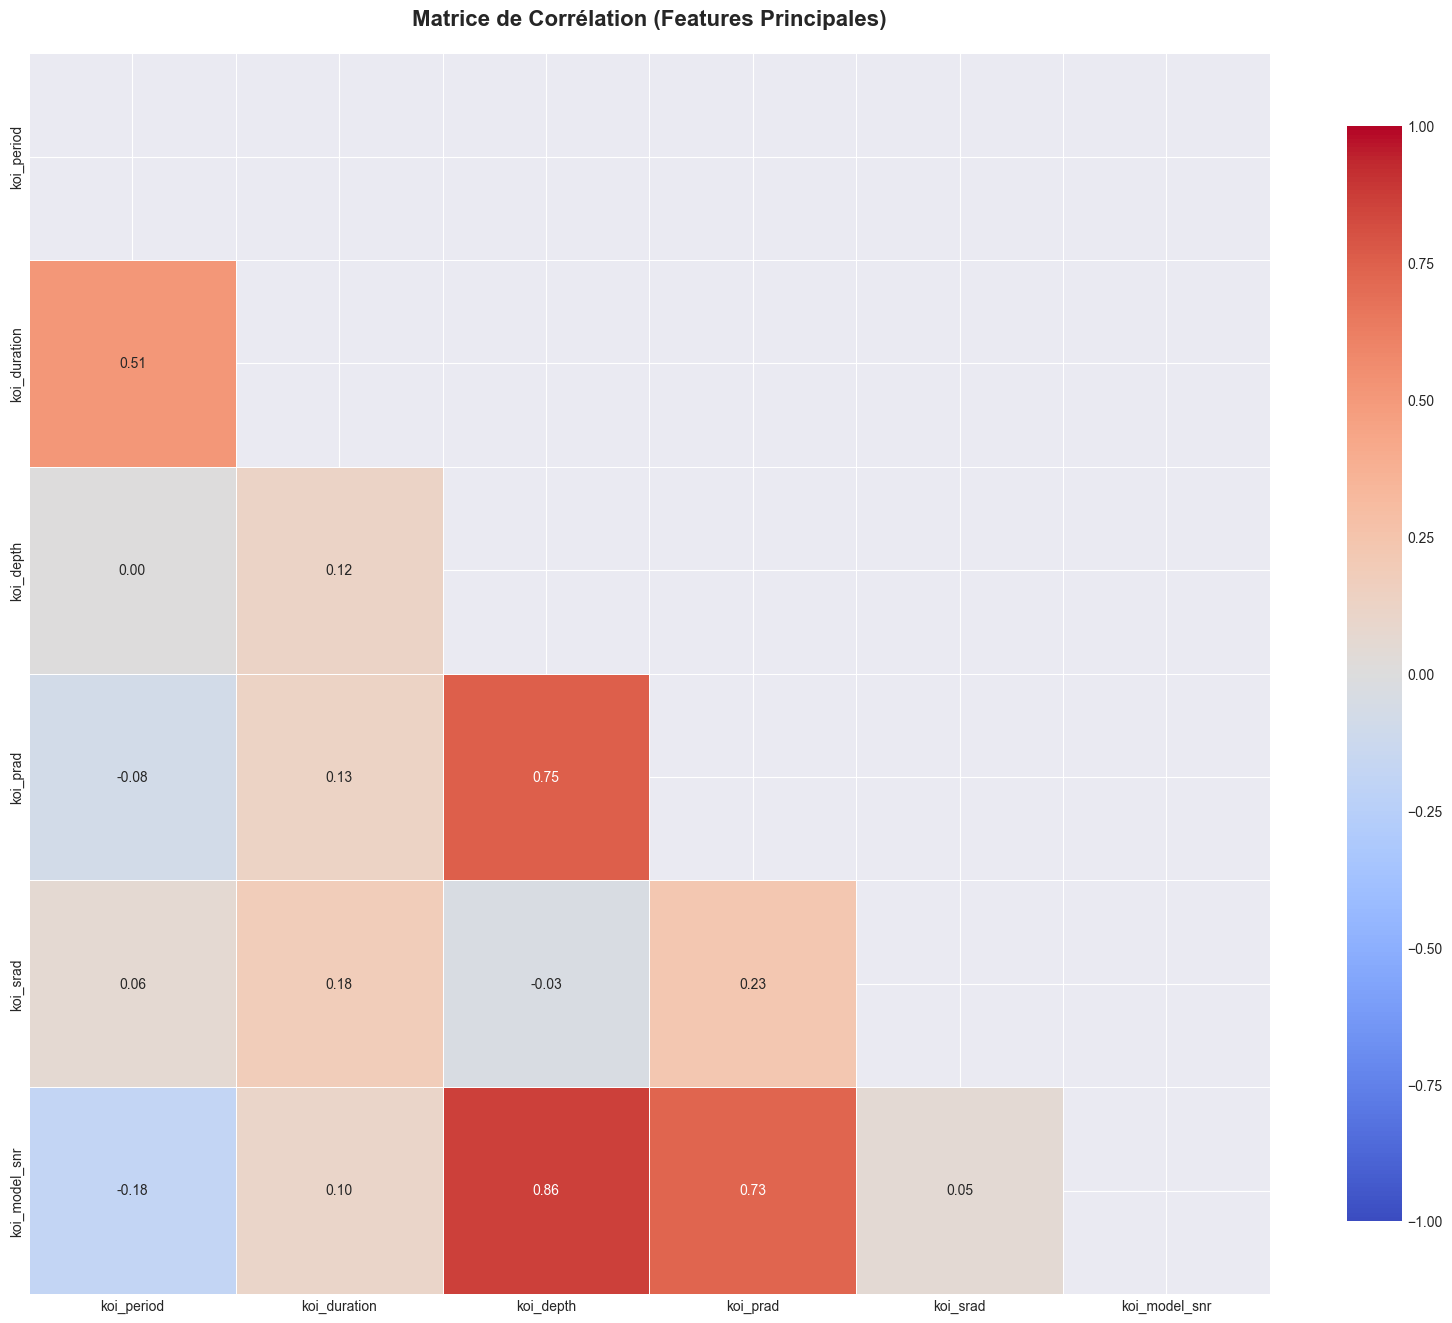

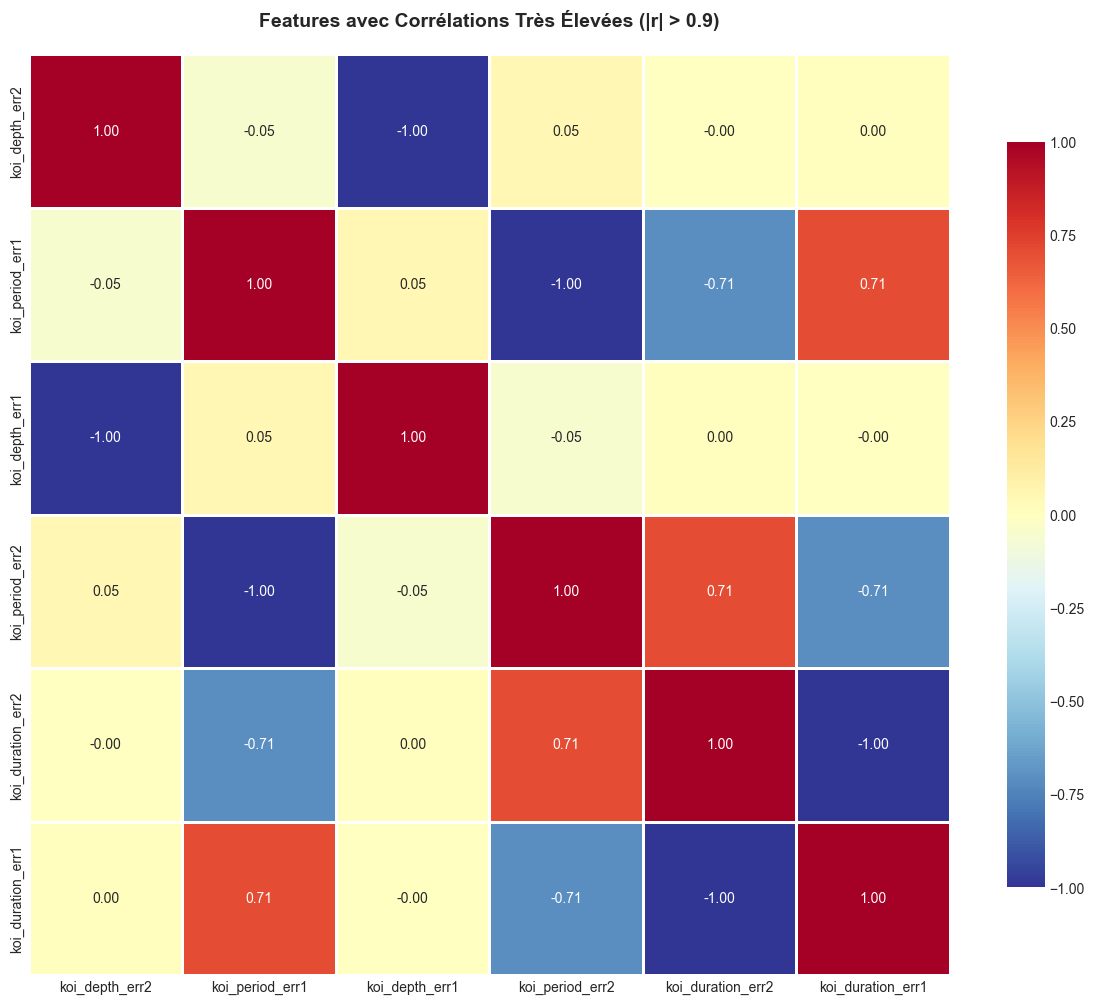

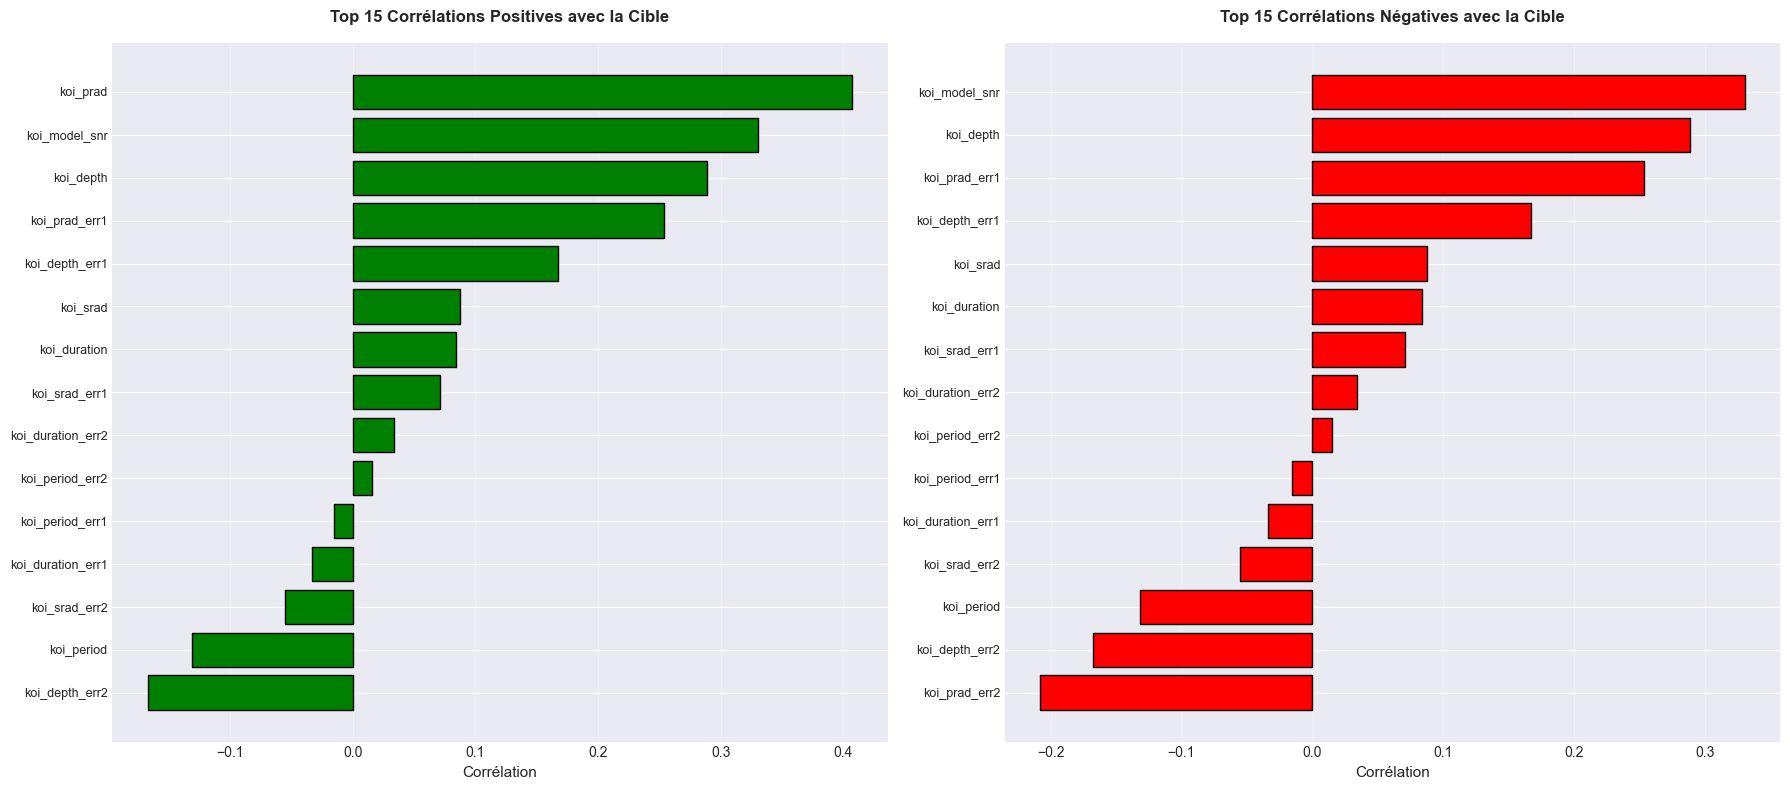

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Charger les données
X = pd.read_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step2_X_features.csv')
y = pd.read_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step2_y_target.csv')

print(f"{'='*80}")
print(f"ÉTAPE 4 - ANALYSE DE CORRÉLATION")
print(f"{'='*80}\n")

print(f"Dimensions X: {X.shape}")
print(f"Dimensions y: {y.shape}\n")

# ================================================================================
# 1. MATRICE DE CORRÉLATION COMPLÈTE
# ================================================================================

print(f"{'='*80}")
print(f"1. CALCUL DE LA MATRICE DE CORRÉLATION")
print(f"{'='*80}\n")

# Sélectionner uniquement les colonnes numériques
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print(f"Nombre de features numériques: {len(numeric_cols)}")

# Calculer la matrice de corrélation (Pearson)
correlation_matrix = X[numeric_cols].corr()
print(f"✓ Matrice de corrélation calculée: {correlation_matrix.shape}")

# ================================================================================
# 2. IDENTIFICATION DES CORRÉLATIONS ÉLEVÉES
# ================================================================================

print(f"\n{'='*80}")
print(f"2. IDENTIFICATION DES CORRÉLATIONS ÉLEVÉES")
print(f"{'='*80}\n")

# Extraire les paires de features avec corrélation élevée
high_corr_pairs = []
threshold_high = 0.9  # Corrélation très élevée
threshold_moderate = 0.7  # Corrélation modérée à élevée

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold_moderate:
            high_corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': corr_value,
                'Abs_Correlation': abs(corr_value)
            })

# Trier par corrélation absolue décroissante
high_corr_df = pd.DataFrame(high_corr_pairs)
high_corr_df = high_corr_df.sort_values('Abs_Correlation', ascending=False)

# Séparer par niveau de corrélation
very_high = high_corr_df[high_corr_df['Abs_Correlation'] > threshold_high]
moderate_high = high_corr_df[(high_corr_df['Abs_Correlation'] > threshold_moderate) & 
                             (high_corr_df['Abs_Correlation'] <= threshold_high)]

print(f"Corrélations TRÈS ÉLEVÉES (|r| > {threshold_high}):")
print(f"Nombre de paires: {len(very_high)}\n")

if len(very_high) > 0:
    print(very_high[['Feature_1', 'Feature_2', 'Correlation']].to_string(index=False))
    print("\n MULTICOLINÉARITÉ DÉTECTÉE!")
    print(" Recommandation: Supprimer une des deux features dans chaque paire")
else:
    print("Aucune corrélation très élevée détectée")

print(f"\n{'-'*80}")
print(f"Corrélations MODÉRÉES À ÉLEVÉES ({threshold_moderate} < |r| ≤ {threshold_high}):")
print(f"Nombre de paires: {len(moderate_high)}\n")

if len(moderate_high) > 0:
    print(moderate_high[['Feature_1', 'Feature_2', 'Correlation']].head(10).to_string(index=False))
    if len(moderate_high) > 10:
        print(f"\n... et {len(moderate_high) - 10} autres paires")
    print("\nCes corrélations sont acceptables mais à surveiller")
else:
    print(" Aucune corrélation modérée détectée")

# ================================================================================
# 3. VISUALISATION DE LA MATRICE DE CORRÉLATION
# ================================================================================

print(f"\n{'='*80}")
print(f"3. VISUALISATION DE LA MATRICE DE CORRÉLATION")
print(f"{'='*80}\n")

# 3.1 Heatmap complète (features principales seulement)
# Sélectionner les features principales (sans les erreurs)
main_features = [col for col in numeric_cols if not any(x in col for x in ['err1', 'err2', 'log'])]

if len(main_features) > 25:
    main_features = main_features[:25]

print(f"Visualisation des {len(main_features)} features principales...\n")

plt.figure(figsize=(16, 14))
corr_subset = correlation_matrix.loc[main_features, main_features]
mask = np.triu(np.ones_like(corr_subset, dtype=bool))  # Masquer la moitié supérieure

sns.heatmap(corr_subset, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0, 
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            vmin=-1, 
            vmax=1)

plt.title('Matrice de Corrélation (Features Principales)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()


# 3.2 Heatmap des corrélations élevées uniquement
if len(very_high) > 0:
    # Extraire les features impliquées dans les corrélations élevées
    high_corr_features = list(set(very_high['Feature_1'].tolist() + 
                                  very_high['Feature_2'].tolist()))
    
    if len(high_corr_features) > 2:
        plt.figure(figsize=(12, 10))
        corr_high = correlation_matrix.loc[high_corr_features, high_corr_features]
        
        sns.heatmap(corr_high, 
                    annot=True, 
                    fmt='.2f', 
                    cmap='RdYlBu_r',
                    center=0, 
                    square=True, 
                    linewidths=1,
                    cbar_kws={"shrink": 0.8},
                    vmin=-1, 
                    vmax=1)
        
        plt.title('Features avec Corrélations Très Élevées (|r| > 0.9)', 
                  fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()

# ================================================================================
# 4. ANALYSE DES CORRÉLATIONS AVEC LA VARIABLE CIBLE
# ================================================================================

print(f"\n{'='*80}")
print(f"4. CORRÉLATION AVEC LA VARIABLE CIBLE")
print(f"{'='*80}\n")

# Encoder la variable cible pour calculer la corrélation
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y.values.ravel())

# Créer un DataFrame temporaire avec X et y
X_with_target = X[numeric_cols].copy()
X_with_target['target'] = y_encoded

# Calculer la corrélation avec la cible
target_correlation = X_with_target.corr()['target'].drop('target')
target_correlation = target_correlation.sort_values(ascending=False)

print("Top 15 features les plus corrélées avec la cible:\n")
print(f"{'Feature':<30} {'Corrélation':>12}")
print("-" * 43)
for feature, corr in target_correlation.head(15).items():
    print(f"{feature:<30} {corr:>12.4f}")

print("\n\nTop 15 features les moins corrélées (négativement) avec la cible:\n")
print(f"{'Feature':<30} {'Corrélation':>12}")
print("-" * 43)
for feature, corr in target_correlation.tail(15).items():
    print(f"{feature:<30} {corr:>12.4f}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top corrélations positives
ax1 = axes[0]
top_positive = target_correlation.head(15)
ax1.barh(range(len(top_positive)), top_positive.values, color='green', edgecolor='black')
ax1.set_yticks(range(len(top_positive)))
ax1.set_yticklabels(top_positive.index, fontsize=9)
ax1.set_xlabel('Corrélation', fontsize=11)
ax1.set_title('Top 15 Corrélations Positives avec la Cible', 
              fontsize=12, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, axis='x')
ax1.invert_yaxis()

# Top corrélations négatives
ax2 = axes[1]
top_negative = target_correlation.tail(15)
ax2.barh(range(len(top_negative)), top_negative.values, color='red', edgecolor='black')
ax2.set_yticks(range(len(top_negative)))
ax2.set_yticklabels(top_negative.index, fontsize=9)
ax2.set_xlabel('Corrélation', fontsize=11)
ax2.set_title('Top 15 Corrélations Négatives avec la Cible', 
              fontsize=12, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, axis='x')
ax2.invert_yaxis()

plt.tight_layout()

# ================================================================================
# 5. IDENTIFICATION DES FEATURES REDONDANTES
# ================================================================================

print(f"\n{'='*80}")
print(f"5. RECOMMANDATIONS - FEATURES REDONDANTES")
print(f"{'='*80}\n")

if len(very_high) > 0:
    print("Features à considérer pour suppression (paires très corrélées):\n")
    
    # Grouper les features redondantes
    features_to_remove = set()
    
    for idx, row in very_high.iterrows():
        feat1 = row['Feature_1']
        feat2 = row['Feature_2']
        
        # Garder la feature la plus corrélée avec la cible
        corr1 = abs(target_correlation.get(feat1, 0))
        corr2 = abs(target_correlation.get(feat2, 0))
        
        if corr1 >= corr2:
            features_to_remove.add(feat2)
            print(f"  • Supprimer: {feat2}")
            print(f"    Raison: Corrélé à {feat1} (r={row['Correlation']:.3f})")
            print(f"    Corr avec cible: {feat1}={corr1:.3f}, {feat2}={corr2:.3f}\n")
        else:
            features_to_remove.add(feat1)
            print(f"  • Supprimer: {feat1}")
            print(f"    Raison: Corrélé à {feat2} (r={row['Correlation']:.3f})")
            print(f"    Corr avec cible: {feat1}={corr1:.3f}, {feat2}={corr2:.3f}\n")
    
    print(f"\nRésumé: {len(features_to_remove)} features recommandées pour suppression")
    

else:
    print("✓ Aucune feature redondante détectée")

# ================================================================================
# 6. EXPORT DES RÉSULTATS
# ================================================================================

print(f"\n{'='*80}")
print(f"6. EXPORT DES RÉSULTATS")
print(f"{'='*80}\n")


# Sauvegarder les corrélations avec la cible
target_corr_df = pd.DataFrame({
    'Feature': target_correlation.index,
    'Correlation_with_Target': target_correlation.values
})
target_corr_df = target_corr_df.sort_values('Correlation_with_Target', 
                                            key=abs, ascending=False)

# ================================================================================
# 7. RÉSUMÉ FINAL
# ================================================================================

print(f"\n{'='*80}")
print(f"RÉSUMÉ DE L'ANALYSE DE CORRÉLATION")
print(f"{'='*80}\n")

summary = {
    'Total Features': len(numeric_cols),
    'Paires Très Corrélées (|r|>0.9)': len(very_high),
    'Paires Modérément Corrélées (0.7<|r|≤0.9)': len(moderate_high),
    'Features Redondantes Identifiées': len(features_to_remove) if len(very_high) > 0 else 0,
    'Feature Plus Corrélée (positive)': f"{target_correlation.idxmax()} ({target_correlation.max():.3f})",
    'Feature Plus Corrélée (négative)': f"{target_correlation.idxmin()} ({target_correlation.min():.3f})"
}

for key, value in summary.items():
    print(f"  {key}: {value}")

print(f"\n{'='*80}")
print(f"ÉTAPE 4 TERMINÉE ✓")
print(f"{'='*80}")

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# ====================================================================
# ÉTAPE 5 - SUPPRESSION DES FEATURES REDONDANTES ET STANDARDISATION
# ====================================================================

print("="*80)
print("ÉTAPE 5 - SUPPRESSION DES FEATURES ET STANDARDISATION")
print("="*80)

# 1. CHARGEMENT DES DONNÉES
print("\n1. CHARGEMENT DES DONNÉES")
print("-"*80)

X = pd.read_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step2_X_features.csv')
y = pd.read_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step2_y_target.csv')

print(f"✓ Dimensions initiales X: {X.shape}")
print(f"✓ Dimensions y: {y.shape}")

# 2. SUPPRESSION DES FEATURES REDONDANTES
print("\n2. SUPPRESSION DES FEATURES REDONDANTES")
print("-"*80)

features_to_remove = [
    'koi_depth_err2',
    'koi_duration_err2', 
    'koi_period_err2'
]

print(f"Features à supprimer: {len(features_to_remove)}")
for feat in features_to_remove:
    if feat in X.columns:
        print(f"   ✓ Suppression: {feat}")
    else:
        print(f"   ⚠ Non trouvée: {feat}")

X_reduced = X.drop(columns=features_to_remove, errors='ignore')

print(f"\n✓ Dimensions après suppression: {X_reduced.shape}")
print(f"  Features supprimées: {X.shape[1] - X_reduced.shape[1]}")
print(f"  Features restantes: {X_reduced.shape[1]}")

# 3. STANDARDISATION
print("\n3. STANDARDISATION DES FEATURES")
print("-"*80)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Conversion en DataFrame pour garder les noms de colonnes
X_scaled_df = pd.DataFrame(X_scaled, columns=X_reduced.columns, index=X_reduced.index)

print(f" Standardisation appliquée avec StandardScaler")
print(f"  Moyenne après standardisation: {X_scaled_df.mean().mean():.6f} (≈ 0)")
print(f"  Écart-type après standardisation: {X_scaled_df.std().mean():.6f} (≈ 1)")

# 4. VÉRIFICATION DE LA STANDARDISATION
print("\n4. VÉRIFICATION DE LA STANDARDISATION")
print("-"*80)

print("\nExemple sur les 5 premières features:")
print(f"{'Feature':<25} {'Moy. Avant':<12} {'Moy. Après':<12} {'Std Avant':<12} {'Std Après':<12}")
print("-"*73)

for col in X_reduced.columns[:5]:
    mean_before = X_reduced[col].mean()
    mean_after = X_scaled_df[col].mean()
    std_before = X_reduced[col].std()
    std_after = X_scaled_df[col].std()
    print(f"{col:<25} {mean_before:>11.2f} {mean_after:>11.6f} {std_before:>11.2f} {std_after:>11.6f}")

# 5. SAUVEGARDE DES RÉSULTATS
print("\n5. SAUVEGARDE DES RÉSULTATS")
print("-"*80)

# Sauvegarder uniquement les features standardisées
X_scaled_df.to_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step5_X_scaled.csv', index=False)
print("✓ Features standardisées sauvegardées: step5_X_scaled.csv")

# Sauvegarder la target (inchangée)
y.to_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step5_y_target.csv', index=False)
print("✓ Target sauvegardée: step5_y_target.csv")

# Sauvegarder le scaler pour utilisation future
joblib.dump(scaler, 'C:/Users/chaym/Desktop/NasaChallenge/data/processed/step5_scaler.pkl')
print("✓ Scaler sauvegardé: step5_scaler.pkl")


# 6. RÉSUMÉ FINAL
print("\n" + "="*80)
print("RÉSUMÉ DE L'ÉTAPE 5")
print("="*80)

print(f"\n📊 DONNÉES:")
print(f"  • Features initiales: {X.shape[1]}")
print(f"  • Features supprimées: {len(features_to_remove)}")
print(f"  • Features finales: {X_scaled_df.shape[1]}")
print(f"  • Nombre d'observations: {X_scaled_df.shape[0]}")

print(f"\n FEATURES SUPPRIMÉES:")
for feat in features_to_remove:
    print(f"  • {feat}")

print(f"\nSTANDARDISATION:")
print(f"  • Méthode: StandardScaler (z-score)")
print(f"  • Formule: z = (x - μ) / σ")
print(f"  • Moyenne finale: ≈ 0")
print(f"  • Écart-type final: ≈ 1")

print(f"\n FICHIERS SAUVEGARDÉS:")
print(f"  • step5_X_scaled.csv ({X_scaled_df.shape[1]} features × {X_scaled_df.shape[0]} observations)")
print(f"  • step5_y_target.csv ({y.shape[0]} observations)")
print(f"  • step5_scaler.pkl (pour réutilisation)")

print("\n" + "="*80)
print( "ÉTAPE 5 TERMINÉE AVEC SUCCÈS")
print("="*80)

ÉTAPE 5 - SUPPRESSION DES FEATURES ET STANDARDISATION

1. CHARGEMENT DES DONNÉES
--------------------------------------------------------------------------------
✓ Dimensions initiales X: (9564, 16)
✓ Dimensions y: (9564, 1)

2. SUPPRESSION DES FEATURES REDONDANTES
--------------------------------------------------------------------------------
Features à supprimer: 3
   ✓ Suppression: koi_depth_err2
   ✓ Suppression: koi_duration_err2
   ✓ Suppression: koi_period_err2

✓ Dimensions après suppression: (9564, 13)
  Features supprimées: 3
  Features restantes: 13

3. STANDARDISATION DES FEATURES
--------------------------------------------------------------------------------
 Standardisation appliquée avec StandardScaler
  Moyenne après standardisation: -0.000000 (≈ 0)
  Écart-type après standardisation: 1.000052 (≈ 1)

4. VÉRIFICATION DE LA STANDARDISATION
--------------------------------------------------------------------------------

Exemple sur les 5 premières features:
Feature     

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# ====================================================================
# ÉTAPE 6 - SPLIT TRAIN/VAL/TEST/NEW DATA STRATIFIÉ + LABELISATION
# ====================================================================

print("="*80)
print("ÉTAPE 6 - SPLIT TRAIN/VAL/TEST/NEW DATA STRATIFIÉ + LABELISATION")
print("="*80)

# 1. CHARGEMENT DES DONNÉES
print("\n1. CHARGEMENT DES DONNÉES")
print("-"*80)

X_scaled = pd.read_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step5_X_scaled.csv')
y_original = pd.read_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step5_y_target.csv')

print(f"✓ Dimensions X: {X_scaled.shape}")
print(f"✓ Dimensions y: {y_original.shape}")

# 2. LABELISATION DE LA VARIABLE CIBLE
print("\n2. LABELISATION DE LA VARIABLE CIBLE")
print("-"*80)

# Mapping des classes vers des labels numériques
label_mapping = {
    'FALSE POSITIVE': 0,
    'CANDIDATE': 1,
    'CONFIRMED': 2
}

# Application du mapping
y_labeled = y_original.copy()
y_labeled['koi_disposition'] = y_labeled['koi_disposition'].map(label_mapping)

print("✓ Mapping appliqué:")
for class_name, label in label_mapping.items():
    count = (y_labeled['koi_disposition'] == label).sum()
    print(f"  {label} ← {class_name:<15} ({count} obs)")

# 3. VÉRIFICATION DE LA DISTRIBUTION INITIALE
print("\n3. DISTRIBUTION INITIALE DES CLASSES")
print("-"*80)

initial_dist = y_labeled['koi_disposition'].value_counts().sort_index()
print("\nNombre d'observations par classe:")
for label, count in initial_dist.items():
    class_name = [k for k, v in label_mapping.items() if v == label][0]
    pct = (count / len(y_labeled)) * 100
    print(f"  Classe {label} ({class_name:<15}): {count:>4} obs ({pct:>5.2f}%)")

# 4. SPLIT TRAIN/TEMP (70% / 30%)
print("\n4. PREMIER SPLIT: TRAIN (70%) / TEMP (30%)")
print("-"*80)

X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled,
    y_labeled,
    test_size=0.3,
    random_state=42,
    stratify=y_labeled
)

print(f"✓ X_train: {X_train.shape}")
print(f"✓ X_temp:  {X_temp.shape}")
print(f"✓ y_train: {y_train.shape}")
print(f"✓ y_temp:  {y_temp.shape}")

# 5. SPLIT TEMP EN VAL/TEST_TEMP (33.33% / 66.67% du temp = 10% / 20% du total)
print("\n5. DEUXIÈME SPLIT: VAL (10%) / TEST_TEMP (20%)")
print("-"*80)

X_val, X_test_temp, y_val, y_test_temp = train_test_split(
    X_temp,
    y_temp,
    test_size=2/3,  # 2/3 de 30% = 20%
    random_state=42,
    stratify=y_temp
)

print(f"✓ X_val:       {X_val.shape}")
print(f"✓ X_test_temp: {X_test_temp.shape}")
print(f"✓ y_val:       {y_val.shape}")
print(f"✓ y_test_temp: {y_test_temp.shape}")

# 6. SPLIT TEST_TEMP EN TEST/NEW DATA (50% / 50% du test_temp = 10% / 10% du total)
print("\n6. TROISIÈME SPLIT: TEST (10%) / NEW DATA (10%)")
print("-"*80)

X_test, X_new, y_test, y_new = train_test_split(
    X_test_temp,
    y_test_temp,
    test_size=0.5,  # 50% de 20% = 10%
    random_state=42,
    stratify=y_test_temp
)

print(f"✓ X_test: {X_test.shape}")
print(f"✓ X_new:  {X_new.shape}")
print(f"✓ y_test: {y_test.shape}")
print(f"✓ y_new:  {y_new.shape}")

# 7. VÉRIFICATION DE LA STRATIFICATION
print("\n7. VÉRIFICATION DE LA STRATIFICATION PAR CLASSE")
print("-"*80)

def print_distribution(y_data, dataset_name):
    dist = y_data['koi_disposition'].value_counts().sort_index()
    print(f"\n{dataset_name}:")
    print(f"  {'Classe':<8} {'Label':<20} {'Count':<8} {'%':<8}")
    print("  " + "-"*50)
    for label, count in dist.items():
        class_name = [k for k, v in label_mapping.items() if v == label][0]
        pct = (count / len(y_data)) * 100
        print(f"  {label:<8} {class_name:<20} {count:<8} {pct:>6.2f}%")

print_distribution(y_train, "TRAIN (70%)")
print_distribution(y_val, "VAL (10%)")
print_distribution(y_test, "TEST (10%)")
print_distribution(y_new, "NEW DATA (10%)")

# 8. VÉRIFICATION DES PROPORTIONS PAR CLASSE
print("\n8. VÉRIFICATION: NOMBRE D'OBSERVATIONS PAR CLASSE DANS CHAQUE SPLIT")
print("-"*80)

print(f"\n{'Classe':<20} {'Total':<10} {'Train (70%)':<15} {'Val (10%)':<15} {'Test (10%)':<15} {'New (10%)':<15}")
print("-"*100)

for label in sorted(y_labeled['koi_disposition'].unique()):
    class_name = [k for k, v in label_mapping.items() if v == label][0]
    total = (y_labeled['koi_disposition'] == label).sum()
    train_count = (y_train['koi_disposition'] == label).sum()
    val_count = (y_val['koi_disposition'] == label).sum()
    test_count = (y_test['koi_disposition'] == label).sum()
    new_count = (y_new['koi_disposition'] == label).sum()
    
    train_pct = (train_count / total) * 100
    val_pct = (val_count / total) * 100
    test_pct = (test_count / total) * 100
    new_pct = (new_count / total) * 100
    
    print(f"{class_name:<20} {total:<10} {train_count:<6} ({train_pct:>5.1f}%) {val_count:<6} ({val_pct:>5.1f}%) {test_count:<6} ({test_pct:>5.1f}%) {new_count:<6} ({new_pct:>5.1f}%)")

# 9. VISUALISATION DE LA DISTRIBUTION
print("\n9. VISUALISATION DE LA DISTRIBUTION")
print("-"*80)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

datasets = [
    (y_labeled, 'Distribution Initiale'),
    (y_train, 'Train (70%)'),
    (y_val, 'Val (10%)'),
    (y_test, 'Test (10%)'),
    (y_new, 'New Data (10%)')
]

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, (data, title) in enumerate(datasets):
    dist = data['koi_disposition'].value_counts().sort_index()
    labels = [f"{[k for k, v in label_mapping.items() if v == label][0]}\n({label})" 
              for label in dist.index]
    
    axes[idx].bar(range(len(dist)), dist.values, color=colors)
    axes[idx].set_xticks(range(len(dist)))
    axes[idx].set_xticklabels(labels, rotation=0, ha='center', fontsize=9)
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Nombre d\'observations')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for i, v in enumerate(dist.values):
        axes[idx].text(i, v + max(dist.values)*0.02, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.close()

# 10. SAUVEGARDE DES DATASETS
print("\n10. SAUVEGARDE DES DATASETS")
print("-"*80)

# Sauvegarder les features
X_train.to_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step6_X_train.csv', index=False)
X_val.to_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step6_X_val.csv', index=False)
X_test.to_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step6_X_test.csv', index=False)
X_new.to_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step6_X_new.csv', index=False)

print("✓ X_train sauvegardé: step6_X_train.csv")
print("✓ X_val sauvegardé: step6_X_val.csv")
print("✓ X_test sauvegardé: step6_X_test.csv")
print("✓ X_new sauvegardé: step6_X_new.csv")

# Sauvegarder les targets
y_train.to_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step6_y_train.csv', index=False)
y_val.to_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step6_y_val.csv', index=False)
y_test.to_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step6_y_test.csv', index=False)
y_new.to_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step6_y_new.csv', index=False)

print("✓ y_train sauvegardé: step6_y_train.csv")
print("✓ y_val sauvegardé: step6_y_val.csv")
print("✓ y_test sauvegardé: step6_y_test.csv")
print("✓ y_new sauvegardé: step6_y_new.csv")

# Sauvegarder le mapping des labels
label_mapping_df = pd.DataFrame([
    {'class_name': k, 'label': v} for k, v in label_mapping.items()
])
label_mapping_df.to_csv('C:/Users/chaym/Desktop/NasaChallenge/data/processed/step6_label_mapping.csv', index=False)
print("✓ Mapping des labels: step6_label_mapping.csv")

# 11. RÉSUMÉ FINAL
print("\n" + "="*80)
print("RÉSUMÉ FINAL")
print("="*80)

print(f"\nDIMENSIONS:")
print(f"  Total observations: {len(X_scaled)}")
print(f"  Nombre de features: {X_scaled.shape[1]}")
print(f"  Train:    {X_train.shape[0]} observations ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"  Val:      {X_val.shape[0]} observations ({X_val.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"  Test:     {X_test.shape[0]} observations ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"  New Data: {X_new.shape[0]} observations ({X_new.shape[0]/len(X_scaled)*100:.1f}%)")

print(f"\n LABELISATION:")
for class_name, label in label_mapping.items():
    print(f"  {label} ← {class_name}")

print(f"\n STRATIFICATION VÉRIFIÉE:")
print(f"  Chaque classe est représentée proportionnellement dans train/val/test/new")

print("\n" + "="*80)
print("ÉTAPE 6 TERMINÉE ✓")


ÉTAPE 6 - SPLIT TRAIN/VAL/TEST/NEW DATA STRATIFIÉ + LABELISATION

1. CHARGEMENT DES DONNÉES
--------------------------------------------------------------------------------
✓ Dimensions X: (9564, 13)
✓ Dimensions y: (9564, 1)

2. LABELISATION DE LA VARIABLE CIBLE
--------------------------------------------------------------------------------
✓ Mapping appliqué:
  0 ← FALSE POSITIVE  (4839 obs)
  1 ← CANDIDATE       (1979 obs)
  2 ← CONFIRMED       (2746 obs)

3. DISTRIBUTION INITIALE DES CLASSES
--------------------------------------------------------------------------------

Nombre d'observations par classe:
  Classe 0 (FALSE POSITIVE ): 4839 obs (50.60%)
  Classe 1 (CANDIDATE      ): 1979 obs (20.69%)
  Classe 2 (CONFIRMED      ): 2746 obs (28.71%)

4. PREMIER SPLIT: TRAIN (70%) / TEMP (30%)
--------------------------------------------------------------------------------
✓ X_train: (6694, 13)
✓ X_temp:  (2870, 13)
✓ y_train: (6694, 1)
✓ y_temp:  (2870, 1)

5. DEUXIÈME SPLIT: VAL (10